https://github.com/Shadowjumper3000/ML-fundamentals-2025

# Bike Rental Analysis
This analysis explores patterns in bike rental data to understand key factors influencing rental behavior. The data is sourced from the UCI Machine Learning Repository and contains hourly rental data spanning two years.



AI was used to write/complete a majority of the scripts in this notebook.
The thought process and comments are my own.

I use Kaggle loading here since they offer a free CPU with better specs than mine. If not running on Kaggle this can be disregarded. To run in kaggle simply import notebook and add [BikeData](https://www.kaggle.com/datasets/gabemendez/bike-data) as an input to the dataset section.

This code will automatically save checkpoints to your local machine in the /models directory.
Ensure .venv is activated and the required packages are installed before running the code.
```bash
python -m venv .venv
source .venv/bin/activate  # On Windows use .venv\Scripts\activate
pip install -r requirements.txt
```

For Data Loading I assumed the way the instructions meant for Data to be loaded was from same directory as the notebook. If this is not the case, please change the path to the data in the code below.

In [ ]:
# Check if running in Kaggle environment
import os
IN_KAGGLE = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if IN_KAGGLE:
    # Kaggle-specific paths
    data_path = '/kaggle/input/bike-data/CapitalBikeSharing.csv'
    checkpoint_dir = '/kaggle/working/models'
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Create output directory for downloading models
    os.makedirs('/kaggle/working/output', exist_ok=True)

    print("Running in Kaggle environment.")
    print("Data will be loaded from:", data_path)
    print("Models will be saved to:", checkpoint_dir)
else:
    # Local paths
    data_path = 'hour.csv'
    checkpoint_dir = '/models/checkpoints'
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("Running in local environment.")
    print("Data will be loaded from:", data_path)
    print("Models will be saved to:", checkpoint_dir)

Running in local environment.
Data will be loaded from: ../data/hour.csv
Models will be saved to: ../models/checkpoints


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

# Load the dataset
hour_data = pd.read_csv(data_path)
print("Data loaded from" + data_path)

Data loaded from../data/hour.csv


## 1. Initial Data Exploration
Let's examine the basic structure and statistics of our dataset.

In [3]:
# Initial Data Exploration
print("Dataset Shape:", hour_data.shape)
print("\nDataset Info:")
print(hour_data.info())
print("\nDescriptive Statistics:")
print(hour_data.describe())

Dataset Shape: (17379, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

D

### 1.1 Target Variable Analysis
Analyzing the distribution of bike rentals (cnt) to understand the general rental patterns.


Skewness of cnt: 1.2774116037490577


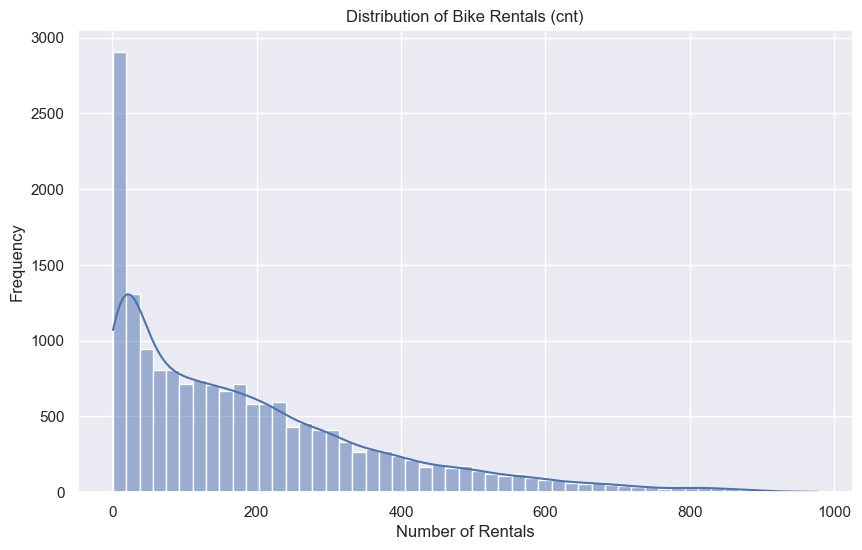

In [4]:
# Target Variable Analysis (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], kde=True)
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
print("\nSkewness of cnt:", hour_data['cnt'].skew())

### 1.2 Temporal Pattern Analysis
Examining how rental patterns vary by hour and season.

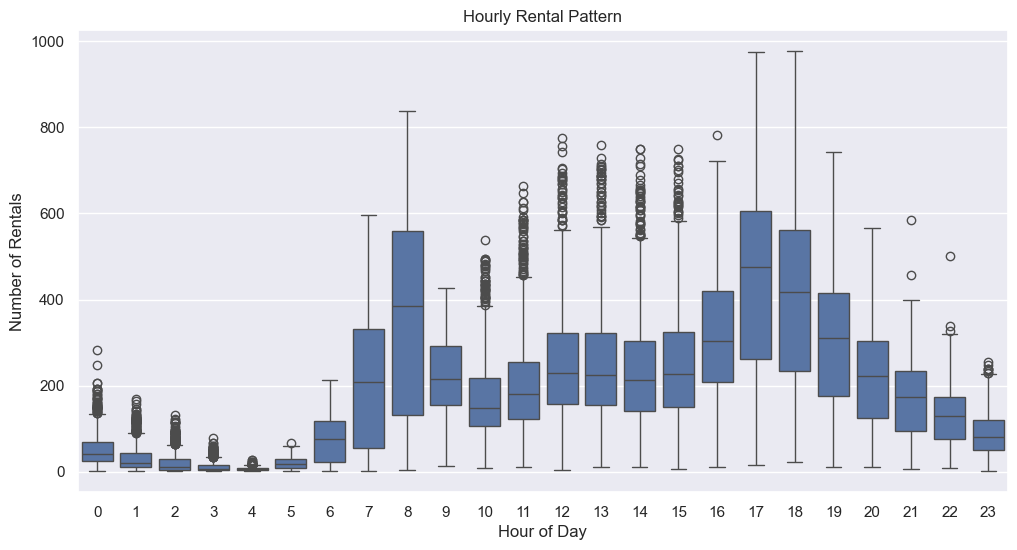

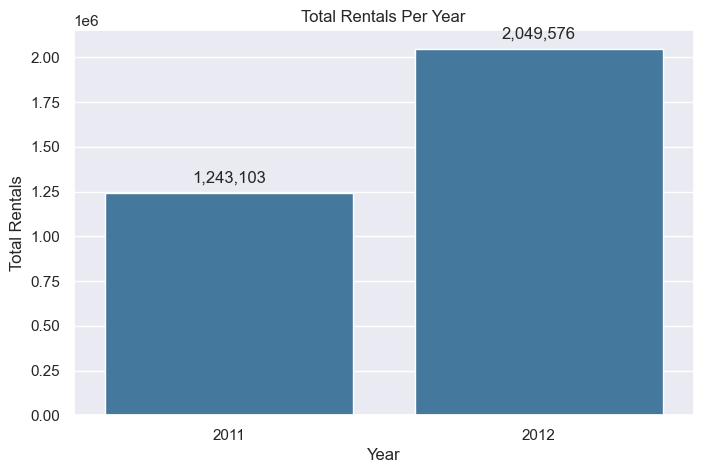

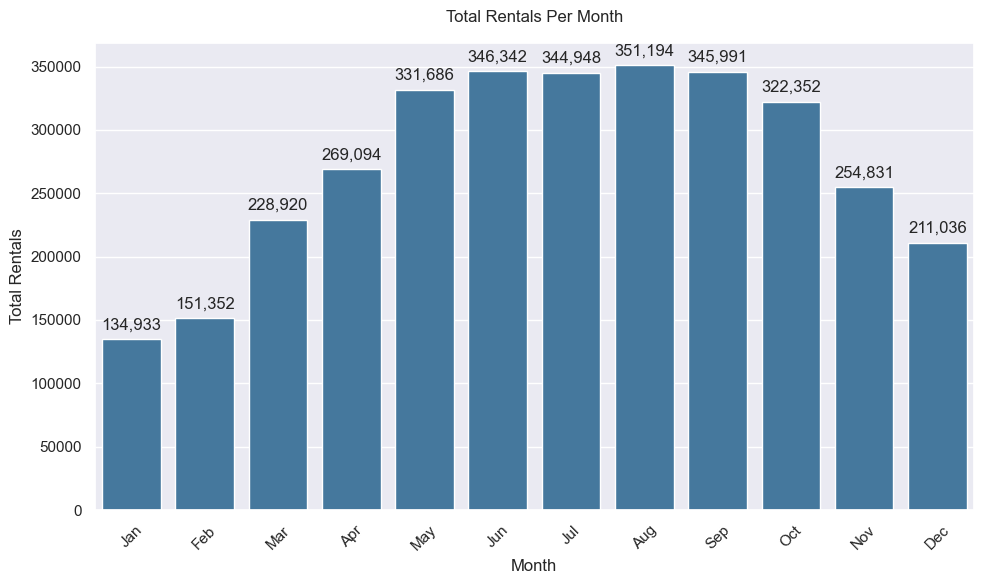

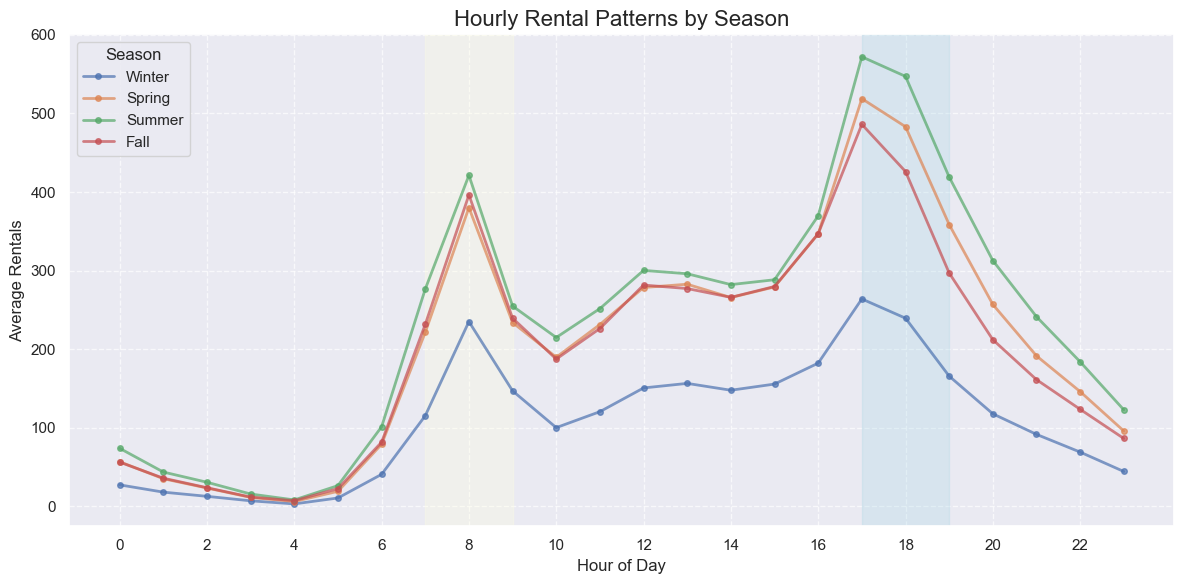

<Figure size 1400x600 with 0 Axes>

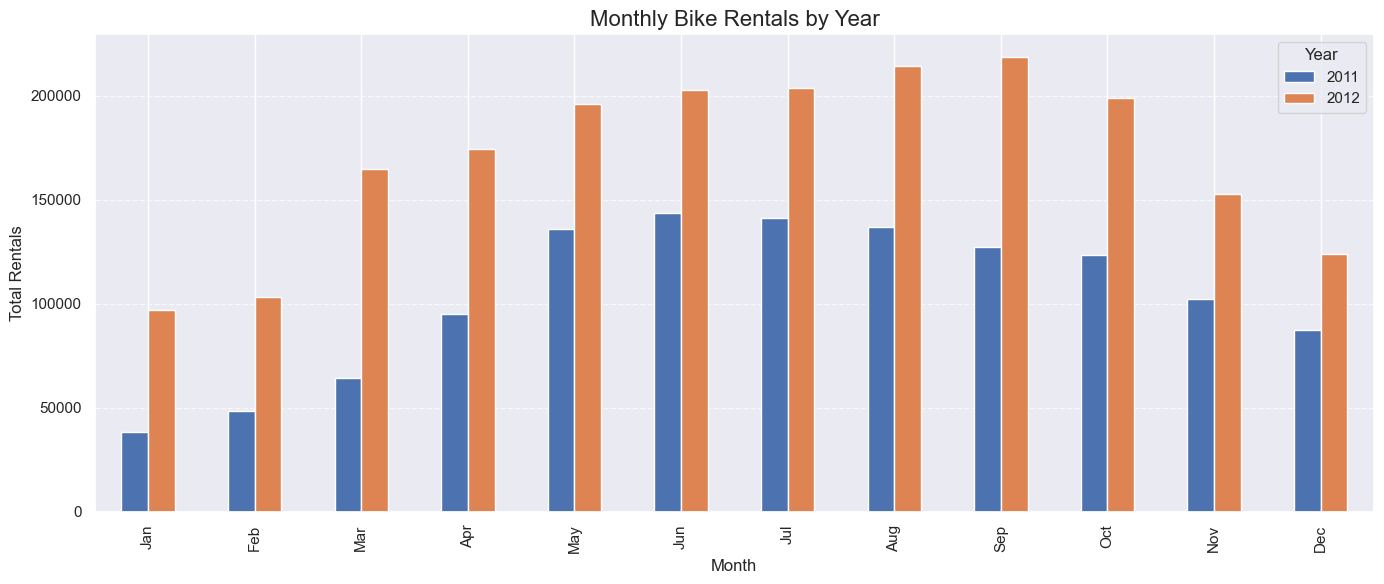

C:\Users\DAHoe\AppData\Local\Temp\ipykernel_992\2430108522.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='season_name', y='cnt', data=season_rentals,


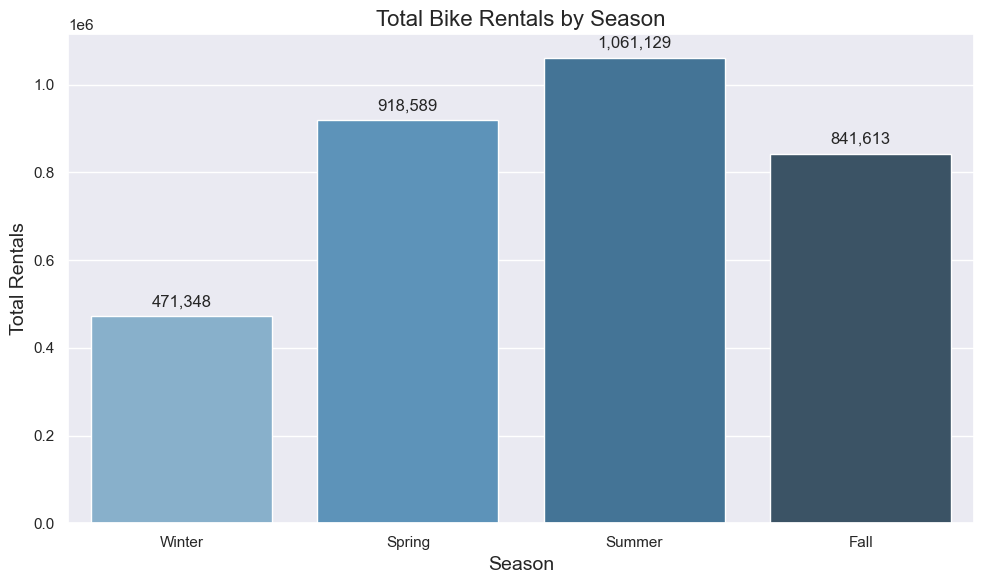

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hour analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_data)
plt.title('Hourly Rental Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.show()

# Rentals per year
# Calculate total rentals per year - safer approach
yearly_rentals = hour_data.groupby('yr')['cnt'].sum().reset_index()
yearly_rentals['year'] = yearly_rentals['yr'].map({0: '2011', 1: '2012'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='cnt', data=yearly_rentals, 
                color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')
plt.show()

# Rentals per month
# Calculate total rentals per month - more robust approach
monthly_rentals = hour_data.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='mnth', y='cnt', data=monthly_rentals, 
                color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Month', pad=15)
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(ticks=range(12), 
          labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
          rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')

plt.tight_layout()
plt.show()

# Create a season-specific visualization to show the distribution
# Generate a seasonal visualization with average rentals
plt.figure(figsize=(12, 6))

# Calculate average rentals per hour by season
season_hourly_avg = hour_data.groupby(['season', 'hr'])['cnt'].mean().unstack()

# Map season numbers to names for better readability
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
season_hourly_avg.index = [season_names[s] for s in season_hourly_avg.index]

# Plot hourly patterns by season
for season in season_hourly_avg.index:
    plt.plot(season_hourly_avg.columns, season_hourly_avg.loc[season], 
             label=season, marker='o', markersize=4, linewidth=2, alpha=0.7)

plt.title('Hourly Rental Patterns by Season', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Season', loc='upper left')

# Highlight morning and evening peaks
plt.axvspan(7, 9, color='lightyellow', alpha=0.3, label='Morning Peak')
plt.axvspan(17, 19, color='lightblue', alpha=0.3, label='Evening Peak')
plt.tight_layout()
plt.show()

# Calculate and plot monthly total rentals by year
monthly_by_year = hour_data.groupby(['yr', 'mnth'])['cnt'].sum().unstack()
monthly_by_year.index = ['2011', '2012']  # Convert year index to readable format

plt.figure(figsize=(14, 6))
monthly_by_year.T.plot(kind='bar', figsize=(14, 6))
plt.title('Monthly Bike Rentals by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate total rentals per season
season_rentals = hour_data.groupby('season')['cnt'].sum().reset_index()

# Map season numbers to more readable names
season_names_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
season_rentals['season_name'] = season_rentals['season'].map(season_names_map)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='season_name', y='cnt', data=season_rentals,
                 palette="Blues_d", order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Total Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')

plt.tight_layout()
plt.show()

We can see that rentals follow an hourly pattern and have increased (nearly doubling) from one year to the next. The hourly peaks will be attributed to commuting/rushour.
Rentals per month vary be season it seems, with increasing rents throughout the summer. This will be following the weather and temperature.

In [6]:
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation between season and month
season_month_crosstab = pd.crosstab(
    hour_data['season'],
    hour_data['mnth']
)

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(season_month_crosstab)

print(f"Chi2: {chi2:.2f}")
print(f"p-value: {p:.10f}")
print(f"DOF: {dof}")
print(f"Hypothesis: {'Rejected' if p < 0.05 else 'Not rejected'}")

# Compare correlation with target variable
print("\nCorrelation with target variable:")
print(f"Season-cnt correlation: {hour_data['season'].corr(hour_data['cnt']):.4f}")
print(f"Month-cnt correlation: {hour_data['mnth'].corr(hour_data['cnt']):.4f}")

Chi2: 41904.38
p-value: 0.0000000000
DOF: 33
Hypothesis: Rejected

Correlation with target variable:
Season-cnt correlation: 0.1781
Month-cnt correlation: 0.1206


As the 'Seasons' and 'mnth's are correlated, we will drop the 'mnth' column as this is less correlated with 'cnt' than 'seasons'. I tested with 'mnth' but achieved overall worse results at the end.

In [7]:
# Drop the mnth column as it's highly correlated with season
hour_data = hour_data.drop(columns=['mnth'])
print("Remaining columns:", hour_data.columns.tolist())

Remaining columns: ['instant', 'dteday', 'season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### 1.3 Holiday and Working Day Analysis
Investigating how holidays and working days affect rental patterns.

C:\Users\DAHoe\AppData\Local\Temp\ipykernel_992\1017616823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
C:\Users\DAHoe\AppData\Local\Temp\ipykernel_992\1017616823.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])


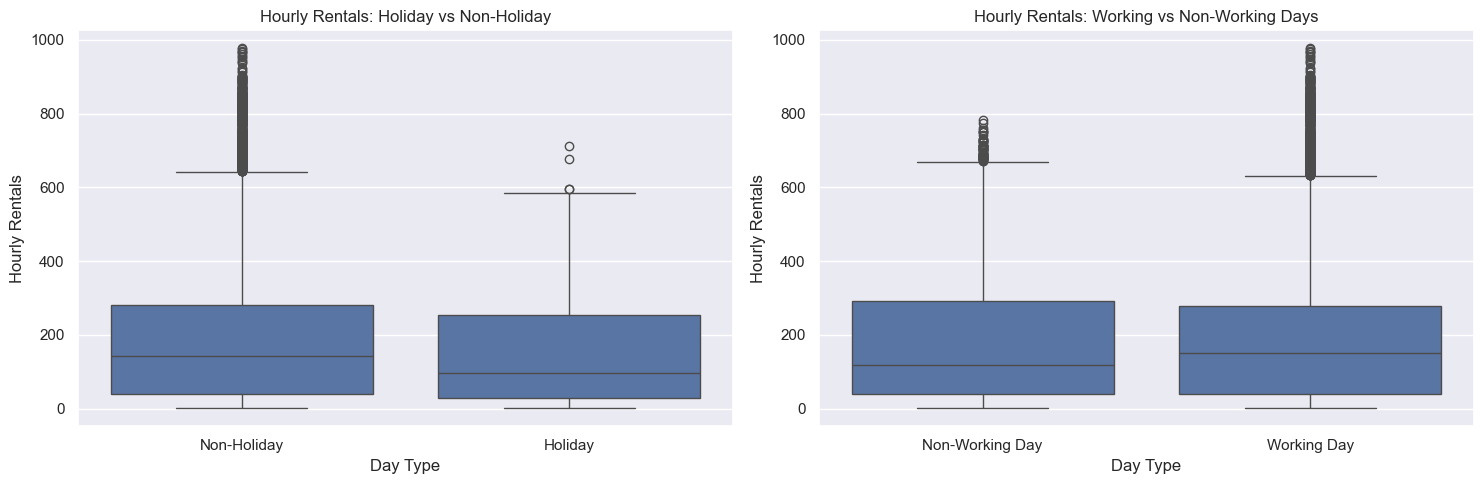

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Holiday analysis at hourly level
holiday_labels = {0: 'Non-Holiday', 1: 'Holiday'}
sns.boxplot(x='holiday', y='cnt', data=hour_data, ax=ax1)
ax1.set_title('Hourly Rentals: Holiday vs Non-Holiday')
ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Hourly Rentals')

# Working day analysis at hourly level
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
sns.boxplot(x='workingday', y='cnt', data=hour_data, ax=ax2)
ax2.set_title('Hourly Rentals: Working vs Non-Working Days')
ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Hourly Rentals')

plt.tight_layout()

On holidays, rentals are significantly lower, while working days show a more consistent rental pattern. This suggests that bike rentals are more popular during weekdays and less so on holidays.
Additionally there are many more outliers.

C:\Users\DAHoe\AppData\Local\Temp\ipykernel_992\2204705607.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day_name', y='cnt', data=weekday_rentals,


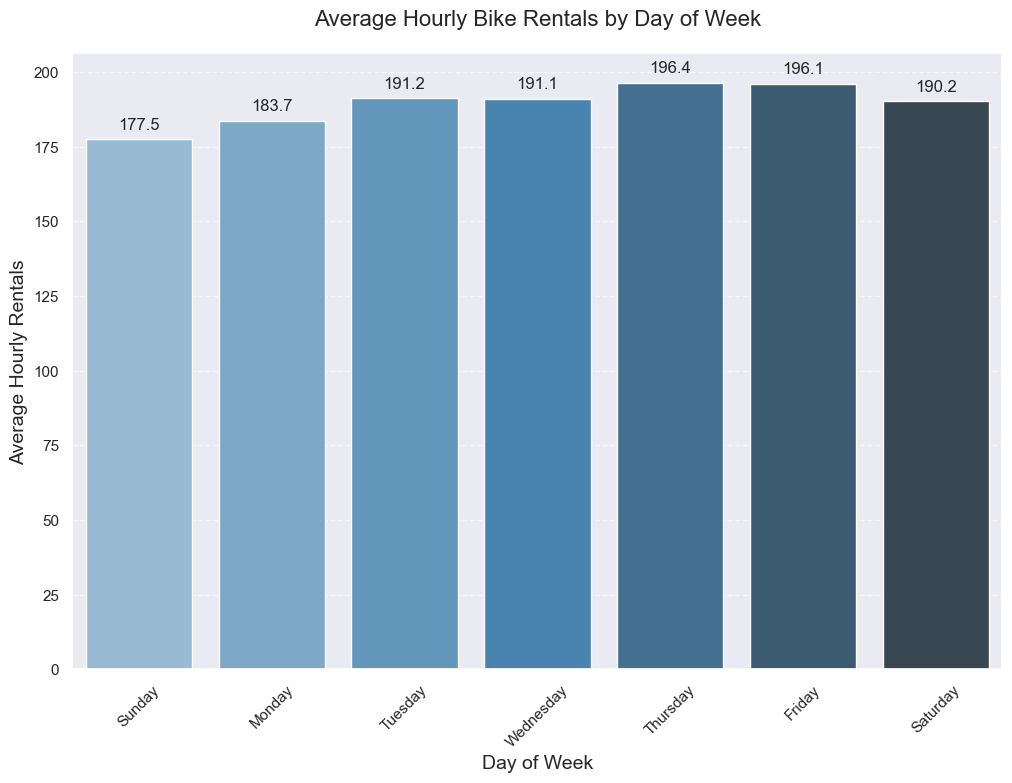

In [9]:
# Create day of week visualization
plt.figure(figsize=(12, 8))

# Calculate average rentals by day of week
weekday_rentals = hour_data.groupby('weekday')['cnt'].mean().reset_index()

# Map weekday numbers to names for better readability
weekday_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
weekday_rentals['day_name'] = weekday_rentals['weekday'].map(weekday_names)

# Create bar plot with improved styling
ax = sns.barplot(x='day_name', y='cnt', data=weekday_rentals, 
                order=[weekday_names[i] for i in range(7)],
                palette='Blues_d')
plt.title('Average Hourly Bike Rentals by Day of Week', fontsize=16, pad=20)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Hourly Rentals', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')

# Add weekday vs weekend comparison
weekday_mask = hour_data['weekday'].isin([1, 2, 3, 4, 5])
weekend_mask = hour_data['weekday'].isin([0, 6])
weekday_avg = hour_data[weekday_mask]['cnt'].mean()
weekend_avg = hour_data[weekend_mask]['cnt'].mean()
diff_pct = ((weekday_avg - weekend_avg) / weekend_avg) * 100

We see that day of the week does not have a significant impact on rentals, this will be due to more leisure rentals on weekends and holidays, whereas workdays are more commuter based.

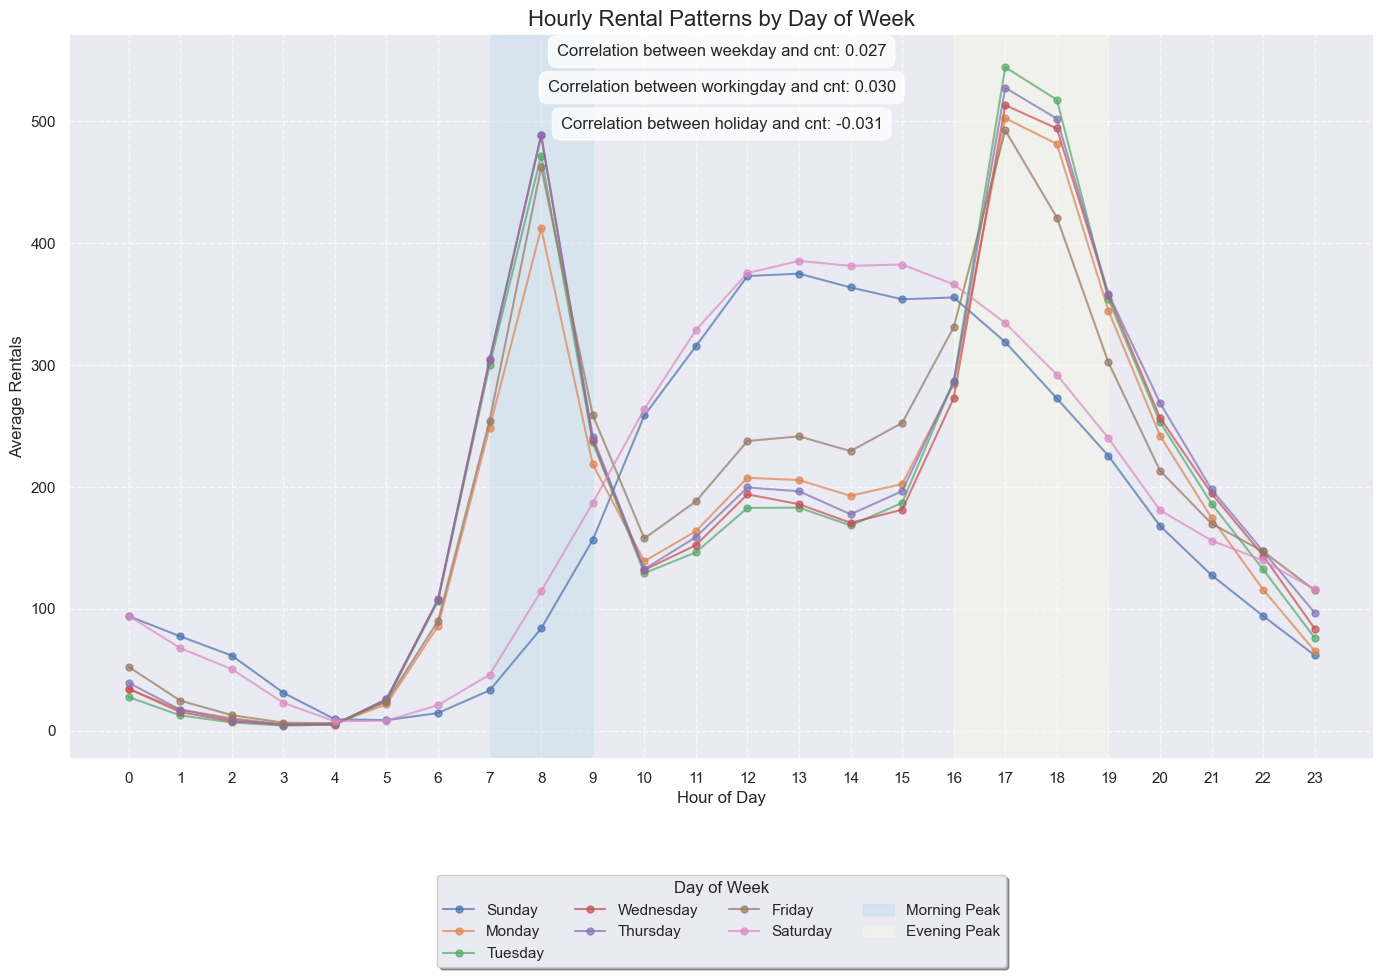

In [10]:
# Analyze weekday effect on bike rentals (cnt) with hourly patterns by day
plt.figure(figsize=(14, 10))

# Create hourly patterns by day of week
hourly_weekday_data = hour_data.pivot_table(
    values='cnt', 
    index='hr', 
    columns='weekday', 
    aggfunc='mean'
)

# Map weekday numbers to names for better readability
hourly_weekday_data.columns = [weekday_names[day] for day in hourly_weekday_data.columns]

# Plot hourly patterns by day of week
for day in hourly_weekday_data.columns:
    plt.plot(hourly_weekday_data.index, hourly_weekday_data[day], 
             label=day, marker='o', markersize=5, alpha=0.7)

# Add highlights for peak hours
plt.axvspan(7, 9, color='lightblue', alpha=0.3, label='Morning Peak')
plt.axvspan(16, 19, color='lightyellow', alpha=0.3, label='Evening Peak')

plt.title('Hourly Rental Patterns by Day of Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Day of Week', loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           fancybox=True, shadow=True, ncol=4)

# Calculate and display correlation between weekday and cnt
weekday_cnt_corr = hour_data['weekday'].corr(hour_data['cnt'])
plt.annotate(f'Correlation between weekday and cnt: {weekday_cnt_corr:.3f}',
            xy=(0.5, 0.97), xycoords='axes fraction',
            ha='center', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))
plt.annotate(f'Correlation between workingday and cnt: {hour_data["workingday"].corr(hour_data["cnt"]):.3f}',
            xy=(0.5, 0.92), xycoords='axes fraction',
            ha='center', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))
plt.annotate(f'Correlation between holiday and cnt: {hour_data["holiday"].corr(hour_data["cnt"]):.3f}',
            xy=(0.5, 0.87), xycoords='axes fraction',
            ha='center', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.tight_layout()
plt.show()

Due to the spread of rentals on weekday vs weekend, we will drop the 'weekday' column as it is less correlated with 'cnt' than 'workingday'. Additionally for model simplicity it only requires learning binary classification of work / !work days. Rather than learning 7 classes of weekdays.

In [11]:
# Drop the weekday column as it's less correlated with 'cnt' than 'workingday'
hour_data = hour_data.drop(columns=['weekday'])
print(f"'weekday' column dropped. Remaining columns: {hour_data.columns.tolist()}")

'weekday' column dropped. Remaining columns: ['instant', 'dteday', 'season', 'yr', 'hr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [12]:
import scipy.stats as stats

# Calculate basic statistics for workingday vs cnt
workingday_stats = hour_data.groupby('workingday')['cnt'].agg(['mean', 'median', 'std', 'count'])
workingday_1 = hour_data[hour_data['workingday'] == 1]['cnt']
workingday_0 = hour_data[hour_data['workingday'] == 0]['cnt']
workingday_ttest = stats.ttest_ind(workingday_1, workingday_0, equal_var=False)

# Calculate basic statistics for holiday vs cnt
holiday_stats = hour_data.groupby('holiday')['cnt'].agg(['mean', 'median', 'std', 'count'])
holiday_1 = hour_data[hour_data['holiday'] == 1]['cnt']
holiday_0 = hour_data[hour_data['holiday'] == 0]['cnt']
holiday_ttest = stats.ttest_ind(holiday_1, holiday_0, equal_var=False)

# Print results
print("WORKINGDAY STATISTICS:")
print(workingday_stats)
print(f"T-test: t={workingday_ttest.statistic:.4f}, p={workingday_ttest.pvalue:.8f}")

print("\nHOLIDAY STATISTICS:")
print(holiday_stats)
print(f"T-test: t={holiday_ttest.statistic:.4f}, p={holiday_ttest.pvalue:.8f}")

# Calculate hourly volume
hourly_workingday = hour_data.groupby(['workingday'])['cnt'].mean()
hourly_holiday = hour_data.groupby(['holiday'])['cnt'].mean()

print(f"\nAVERAGE HOURLY RENTALS:")
print(f"Working days: {hourly_workingday[1]:.2f}")
print(f"Non-working days: {hourly_workingday[0]:.2f}")
print(f"Holidays: {hourly_holiday[1]:.2f}")
print(f"Non-holidays: {hourly_holiday[0]:.2f}")

# Calculate correlation with target
print(f"\nCORRELATION WITH TARGET:")
print(f"Workingday-cnt correlation: {hour_data['workingday'].corr(hour_data['cnt']):.4f}")
print(f"Holiday-cnt correlation: {hour_data['holiday'].corr(hour_data['cnt']):.4f}")

WORKINGDAY STATISTICS:
                  mean  median         std  count
workingday                                       
0           181.405332   119.0  172.853832   5514
1           193.207754   151.0  185.107477  11865
T-test: t=4.0951, p=0.00004249

HOLIDAY STATISTICS:
              mean  median         std  count
holiday                                      
0        190.42858   144.0  181.981435  16879
1        156.87000    97.0  156.757478    500
T-test: t=-4.6942, p=0.00000340

AVERAGE HOURLY RENTALS:
Working days: 193.21
Non-working days: 181.41
Holidays: 156.87
Non-holidays: 190.43

CORRELATION WITH TARGET:
Workingday-cnt correlation: 0.0303
Holiday-cnt correlation: -0.0309


Due to 'workingday' and 'holiday' being correlated, we will drop the 'holiday' column to avoid redundancy and aid in model interpretability.

In [13]:
# Drop the holiday column
hour_data = hour_data.drop(columns=['holiday'])
print(f"'holiday' column dropped. Remaining columns: {hour_data.columns.tolist()}")

'holiday' column dropped. Remaining columns: ['instant', 'dteday', 'season', 'yr', 'hr', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### 1.4 Weather Impact Analysis
Analyzing how different weather conditions affect rental behavior.

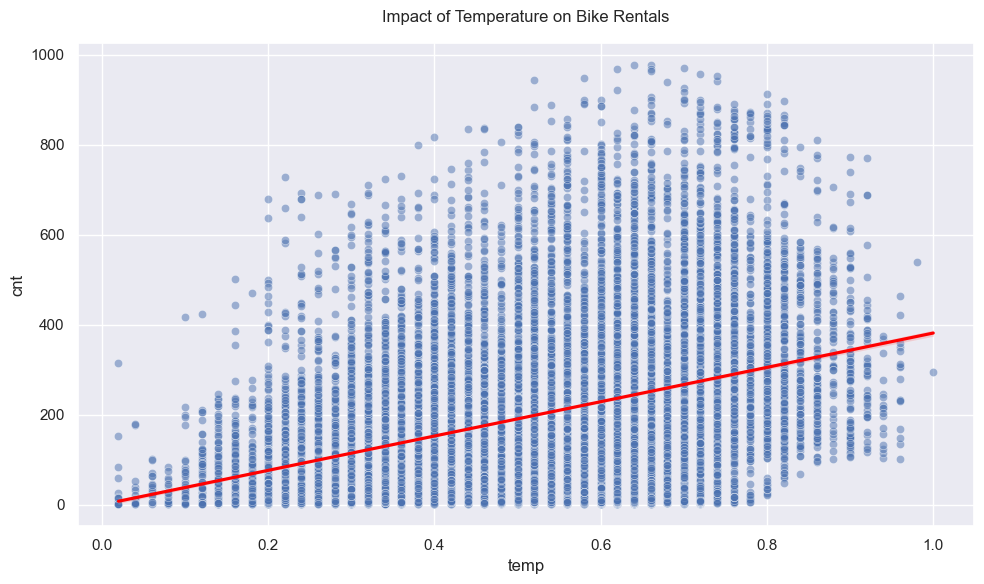

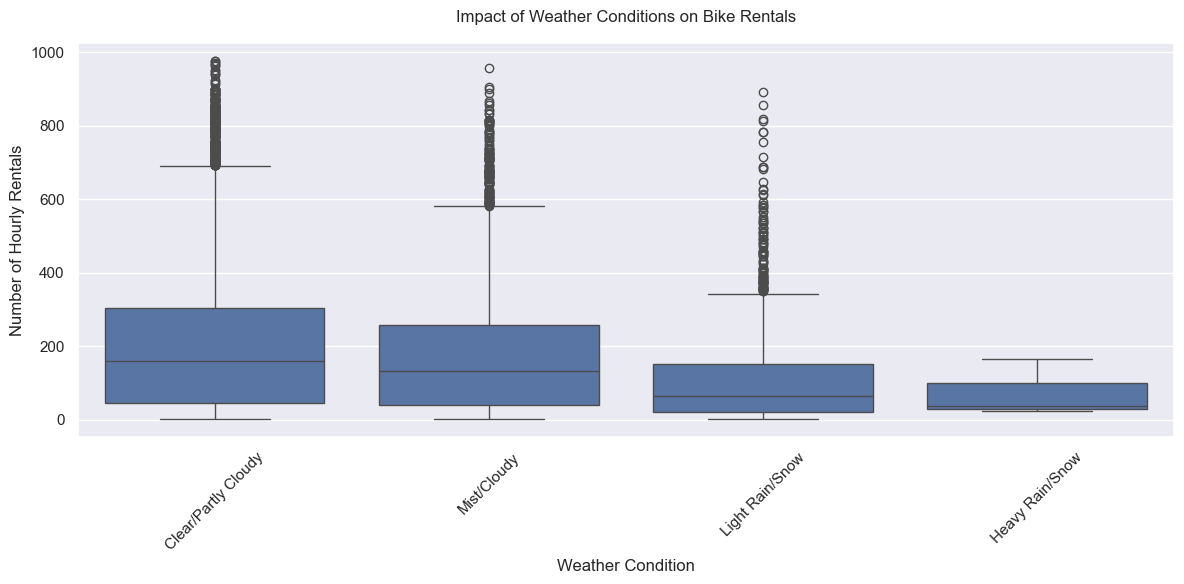

In [14]:
# Define weather situation mapping
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

# Temperature vs Count with improved styling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, alpha=0.5)
plt.title('Impact of Temperature on Bike Rentals', pad=15)
plt.xlabel('Temperature (Normalized 0-1 scale)')
plt.ylabel('Number of Hourly Rentals')

# Add trend line
sns.regplot(x='temp', y='cnt', data=hour_data, scatter=False, color='red')

plt.tight_layout()
plt.show()

# Weather Situation vs Count with descriptive labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Impact of Weather Conditions on Bike Rentals', pad=15)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Hourly Rentals')

# Update x-axis labels with weather descriptions
plt.xticks(range(len(weather_labels)), 
          [weather_labels[i] for i in range(1, 5)], 
          rotation=45)

plt.tight_layout()
plt.show()

Weathersituation varies greatly, as such we wil have to make it easier interpretable for the model later on.

In [15]:
# Calculate rental distribution statistics
print("1. Distribution Statistics:")
print(f"Mean rentals: {hour_data['cnt'].mean():.2f}")
print(f"Median rentals: {hour_data['cnt'].median():.2f}")
print(f"Skewness: {hour_data['cnt'].skew():.2f}")

# Calculate peak hours statistics
hourly_avg = hour_data.groupby('hr')['cnt'].mean()
peak_hours = hourly_avg.nlargest(3)
print("\n2. Peak Hours:")
print(peak_hours)

# Calculate weather correlations
print("\n3. Weather Correlations:")
print(f"Temperature correlation: {hour_data['cnt'].corr(hour_data['temp']):.2f}")
print(f"Humidity correlation: {hour_data['cnt'].corr(hour_data['hum']):.2f}")
print(f"Wind speed correlation: {hour_data['cnt'].corr(hour_data['windspeed']):.2f}")

1. Distribution Statistics:
Mean rentals: 189.46
Median rentals: 142.00
Skewness: 1.28

2. Peak Hours:
hr
17    461.452055
18    425.510989
8     359.011004
Name: cnt, dtype: float64

3. Weather Correlations:
Temperature correlation: 0.40
Humidity correlation: -0.32
Wind speed correlation: 0.09


Correlation between temp and atemp: 0.988

Correlations with rental count (cnt):
Temperature: 0.405
Apparent Temperature: 0.401


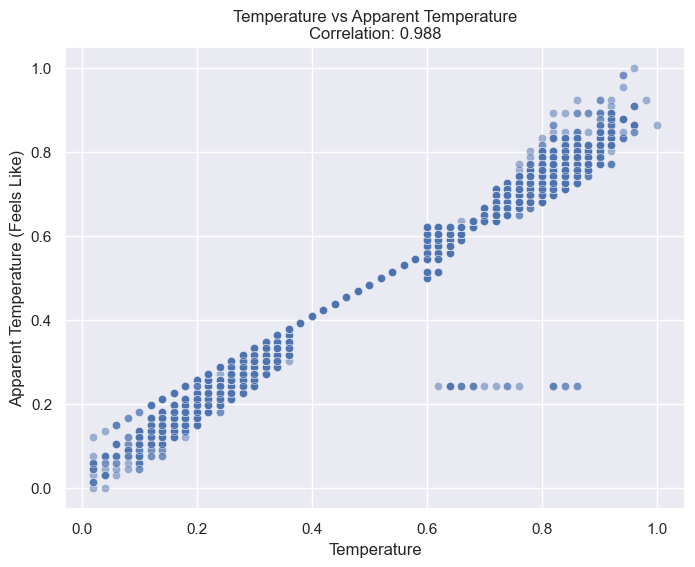

In [16]:
# Calculate correlation between temp and atemp
temp_correlation = hour_data['temp'].corr(hour_data['atemp'])

# Create visualization to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hour_data, x='temp', y='atemp', alpha=0.5)
plt.title(f'Temperature vs Apparent Temperature\nCorrelation: {temp_correlation:.3f}')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature (Feels Like)')

# Print analysis
print(f"Correlation between temp and atemp: {temp_correlation:.3f}")

# Check their individual correlations with the target variable
temp_target_corr = hour_data['temp'].corr(hour_data['cnt'])
atemp_target_corr = hour_data['atemp'].corr(hour_data['cnt'])

print("\nCorrelations with rental count (cnt):")
print(f"Temperature: {temp_target_corr:.3f}")
print(f"Apparent Temperature: {atemp_target_corr:.3f}")

I will dorp the 'temp' column as it is less correlated with 'cnt' than 'atemp'.

In [17]:
hour_data = hour_data.drop(columns=['atemp'])
print("Columns remaining after dropping 'atemp':", hour_data.columns.tolist())

Columns remaining after dropping 'atemp': ['instant', 'dteday', 'season', 'yr', 'hr', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### 1.5 Feature Correlation Analysis
Examining relationships between numerical features.

We will drop the 'instant' column as it is not needed for our analysis. The 'instant' column is an index that we will not use in our analysis.
'casual' and 'registered' columns are also dropped as they are only gathered after bike rental. We will only use the 'cnt' column as our target variable.

In [18]:
# Drop index-like or redundant columns
columns_to_drop = ['instant', 'casual', 'registered']

# Drop columns and create clean dataset
hour_data_clean = hour_data.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("Remaining columns:", hour_data_clean.columns.tolist())

# Update our working dataset
hour_data = hour_data_clean


Columns dropped: ['instant', 'casual', 'registered']
Remaining columns: ['dteday', 'season', 'yr', 'hr', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']


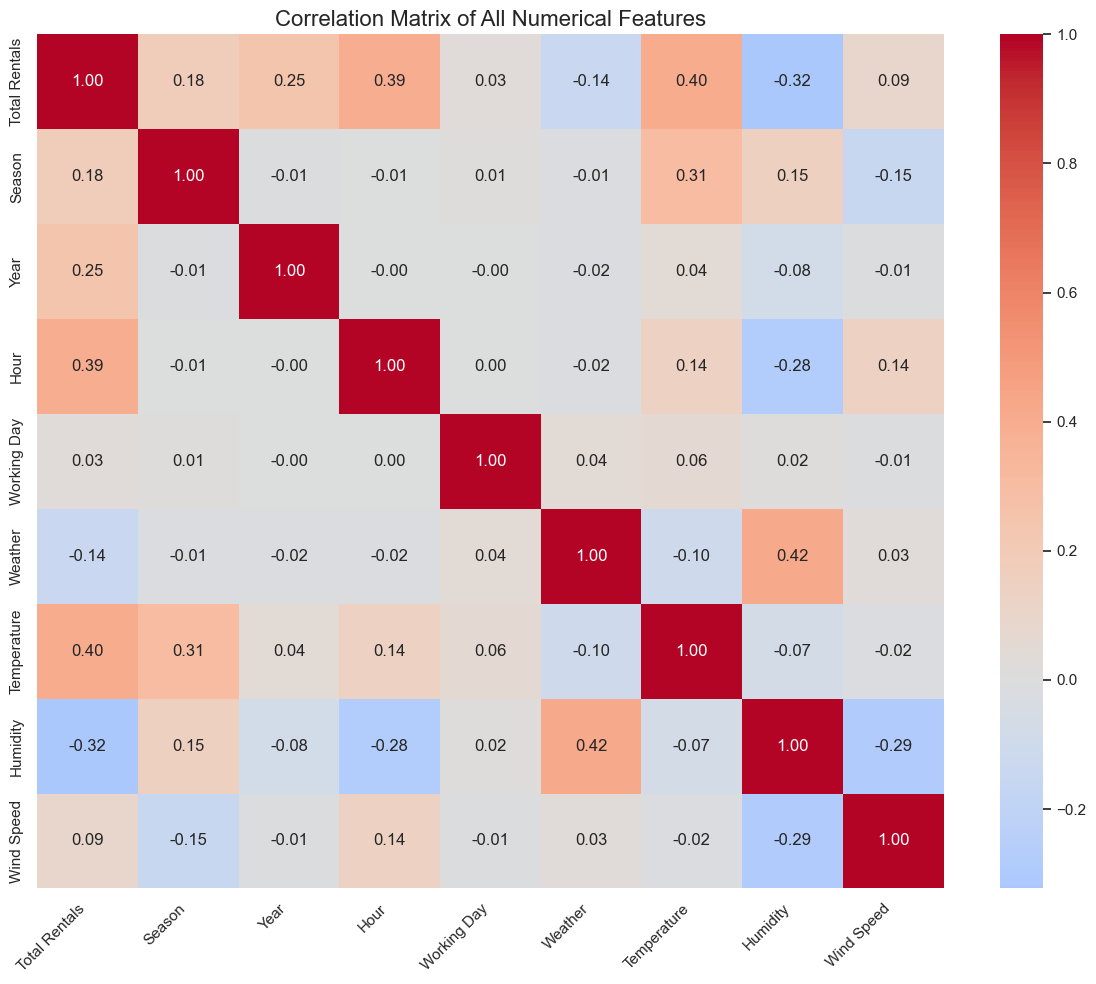

Top correlations with total rentals (cnt):
Temperature: 0.405
Hour: 0.394
Year: 0.250
Season: 0.178
Wind Speed: 0.093
Working Day: 0.030
Weather: -0.142
Humidity: -0.323


In [19]:
# Define labels for all columns
feature_labels = {
    'cnt': 'Total Rentals',
    'season': 'Season',
    'yr': 'Year',
    'hr': 'Hour', 
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
}

# Select all numeric columns for correlation analysis
# Exclude 'instant' (index) and 'dteday' (date) as they're not meaningful for correlation
numeric_columns = [ 'cnt', 'season', 'yr', 'hr', 'workingday', 'weathersit', 
                  'temp', 'hum', 'windspeed']

# Calculate correlation matrix
correlation_matrix = hour_data[numeric_columns].corr()

# Plot correlation matrix with improved readability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            xticklabels=[feature_labels[col] for col in numeric_columns],
            yticklabels=[feature_labels[col] for col in numeric_columns])

plt.title('Correlation Matrix of All Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print top correlations with the target variable (cnt)
correlations_with_target = correlation_matrix['cnt'].drop('cnt').sort_values(ascending=False)
print("Top correlations with total rentals (cnt):")
for col, corr in correlations_with_target.items():
    print(f"{feature_labels[col]}: {corr:.3f}")

In [20]:
# Drop any remaining problematic columns
df_clean = hour_data
del hour_data

print("Final columns in cleaned dataset:", df_clean.columns.tolist())


Final columns in cleaned dataset: ['dteday', 'season', 'yr', 'hr', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']


## 2. Data Splitting


We will split our data into three sets:
- Training set (70%): Used to train the model
- Validation set (15%): Used to tune hyperparameters and evaluate model during training
- Test set (15%): Used for final model evaluation

In [21]:
# Rolling Anchor Data Split for Temporal Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data is sorted chronologically
if 'dteday' in df_clean.columns:
    df_clean = df_clean.sort_values(by=['dteday', 'hr'])
    print(f"Data sorted by date and hour, spanning from {df_clean['dteday'].min()} to {df_clean['dteday'].max()}")
    
    # Remove the dteday column after using it for sorting
    df_clean = df_clean.drop(columns=['dteday'])
    print("Removed 'dteday' column as it's only used for indexing")
else:
    # If no date column exists, we'll assume the data is already in chronological order
    print("No date column found, assuming data is already in chronological order")

# Define split ratios for train, validation, and test (60/20/20)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate split points
n_samples = len(df_clean)
train_size = int(train_ratio * n_samples)
val_size = int(val_ratio * n_samples)

# Split the data chronologically
X = df_clean.drop(columns=['cnt'])
y = df_clean['cnt']

# Create train, validation, and test sets based on indices
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:train_size+val_size]
y_val = y.iloc[train_size:train_size+val_size]

X_test = X.iloc[train_size+val_size:]
y_test = y.iloc[train_size+val_size:]

Data sorted by date and hour, spanning from 2011-01-01 to 2012-12-31
Removed 'dteday' column as it's only used for indexing


Training set: 12165 samples (70.0%)
Validation set: 2606 samples (15.0%)
Test set: 2608 samples (15.0%)


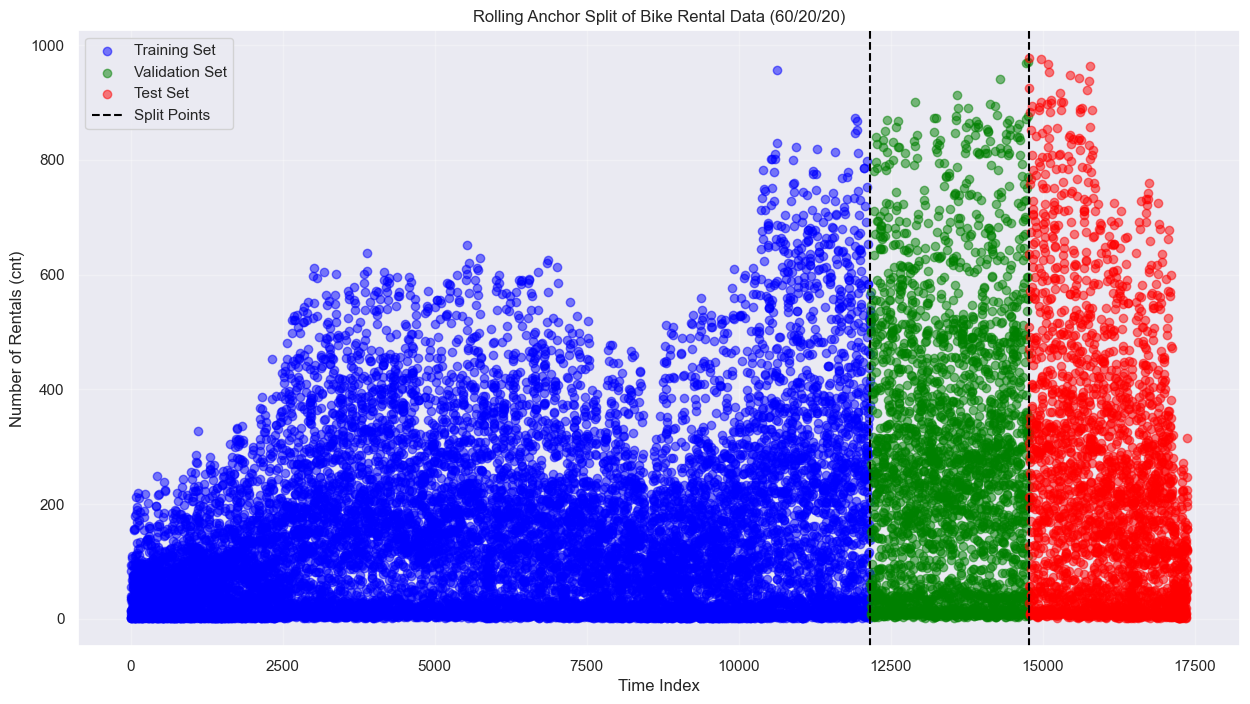

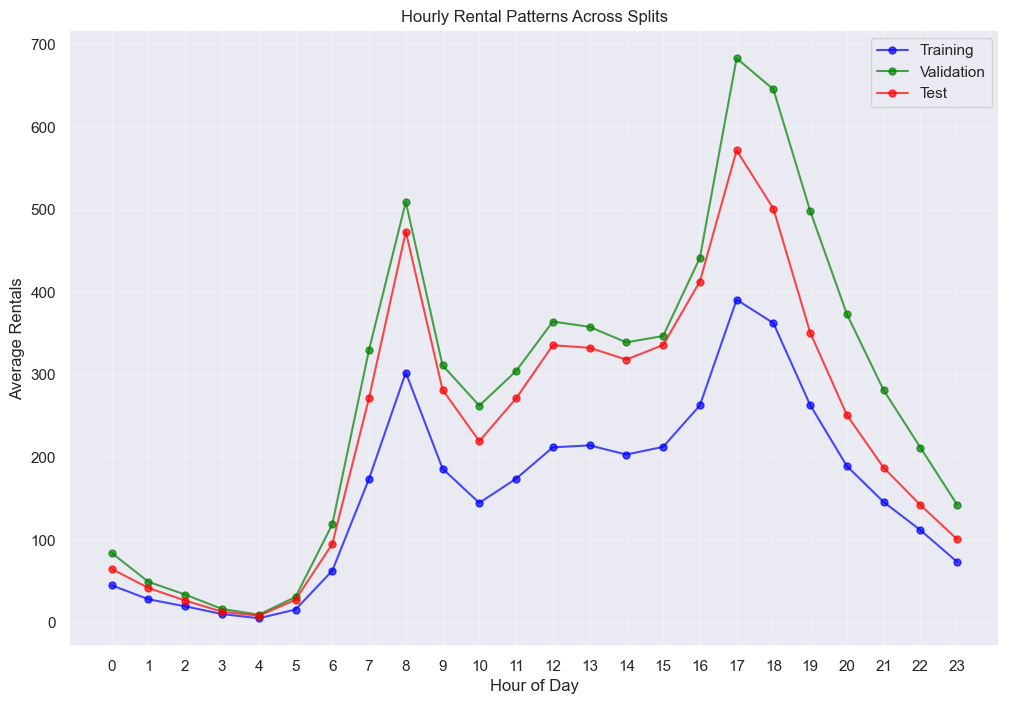

In [22]:

# Print the sizes of each set
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/n_samples:.1%})")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/n_samples:.1%})")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/n_samples:.1%})")

# Visualize the rolling window split
plt.figure(figsize=(15, 8))

# Create a dataframe with indices and target values for visualization
full_data = pd.DataFrame({
    'index': range(len(y)),
    'target': y.values,
    'set': ['train'] * train_size + ['validation'] * val_size + ['test'] * (n_samples - train_size - val_size)
})

# Plot the data color-coded by set
colors = {'train': 'blue', 'validation': 'green', 'test': 'red'}
sets = ['train', 'validation', 'test']
labels = ['Training Set', 'Validation Set', 'Test Set']

# Create scatter plot with time index vs target value
for i, s in enumerate(sets):
    subset = full_data[full_data['set'] == s]
    plt.scatter(subset['index'], subset['target'], 
                color=colors[s], alpha=0.5, label=labels[i])

# Add vertical lines to mark the split points
plt.axvline(x=train_size, color='black', linestyle='--', label='Split Points')
plt.axvline(x=train_size+val_size, color='black', linestyle='--')

plt.title('Rolling Anchor Split of Bike Rental Data (60/20/20)')
plt.xlabel('Time Index')
plt.ylabel('Number of Rentals (cnt)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Check for temporal patterns in each split
if 'hr' in X.columns:
    plt.figure(figsize=(12, 8))
    
    # Hourly patterns in each split
    for i, (X_set, y_set, label, color) in enumerate(zip([X_train, X_val, X_test], 
                                                      [y_train, y_val, y_test],
                                                      ['Training', 'Validation', 'Test'],
                                                      ['blue', 'green', 'red'])):
        hourly_avg = pd.DataFrame({'hr': X_set['hr'], 'cnt': y_set}).groupby('hr').mean()
        plt.plot(hourly_avg.index, hourly_avg['cnt'], 
                 label=label, color=color, marker='o', markersize=5, alpha=0.7)
    
    plt.title('Hourly Rental Patterns Across Splits')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Rentals')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

We can see that due to the temporal ordering of the data we will have issues with the modell underpredicting, I have made the training set larger and grow more into the second year to help with this.

In [23]:
print("Data Columns after splitting:", X_train.columns.tolist())

Data Columns after splitting: ['season', 'yr', 'hr', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


## 3. Feature Engineering

In [24]:
# First, let's identify our feature types
binary_features = ['workingday']
numeric_features = ['temp', 'hum', 'windspeed']
categorical_features = ['weathersit']
cyclical_features = ['hr', 'season']

As Weather consists of multiple features, I will create multiple columns to represent the weather conditions. This will help the model learn better and make more accurate predictions.

In [25]:
# Replace the one-hot encoding of weather with ordinal features that have clear semantic meaning
import pandas as pd
import numpy as np

# Function to create weather features with semantic meaning
def create_weather_features(df):
    """
    Creates meaningful ordinal features from weathersit.
    Weather codes: 1=Clear, 2=Mist/Cloudy, 3=Light Rain/Snow, 4=Heavy Rain/Snow
    
    Parameters:
    - df: DataFrame containing the weathersit column
    
    Returns:
    - DataFrame with added weather features
    """
    # Create a copy to avoid modifying the original
    df_processed = df.copy()
    
    # Create ordinal weather severity score (0-1 scale)
    weather_severity_map = {
        1: 0.0,   # Clear/Partly cloudy - optimal for biking
        2: 0.33,  # Mist/Cloudy - slightly worse
        3: 0.67,  # Light Rain/Snow - significantly worse
        4: 1.0    # Heavy Rain/Snow - worst for biking
    }
    df_processed['weather_severity'] = df_processed['weathersit'].map(weather_severity_map)
    
    # Binary features with clear semantic meaning
    # Is it raining/snowing?
    df_processed['is_precipitation'] = (df_processed['weathersit'] >= 3).astype(int)
    
    # Is visibility reduced?
    df_processed['reduced_visibility'] = (df_processed['weathersit'] >= 2).astype(int)
    
    # Drop the original weathersit column
    df_processed = df_processed.drop(columns=['weathersit'])
    
    return df_processed

# Apply weather feature transformation to each dataset
print("Replacing one-hot encoding with ordinal weather features...")
X_train_processed = create_weather_features(X_train)
X_val_processed = create_weather_features(X_val)
X_test_processed = create_weather_features(X_test)

print("Created the following weather features:")
print("- 'weather_severity': Continuous score from 0.0 (clear) to 1.0 (heavy rain/snow)")
print("- 'is_precipitation': Binary indicator for rain or snow")
print("- 'reduced_visibility': Binary indicator for mist, clouds, or precipitation")

Replacing one-hot encoding with ordinal weather features...
Created the following weather features:
- 'weather_severity': Continuous score from 0.0 (clear) to 1.0 (heavy rain/snow)
- 'is_precipitation': Binary indicator for rain or snow
- 'reduced_visibility': Binary indicator for mist, clouds, or precipitation


We will make a new feature called 'is_rush_hour' to capture the impact of rush hours on bike rentals. This feature will be a binary variable indicating whether the hour is during peak commuting times (7-9 AM and 5-7 PM). This will help us understand how rush hours affect bike rentals and allow us to analyze the impact of commuting patterns on rental behavior.

In [26]:
# Define a function to identify rush hours on working days
def is_rush_hour(hour, workingday):
    """
    Determines if a given hour is during rush hour on a working day.
    Rush hours are defined as 7-9 AM and 5-7 PM (17-19) on working days.
    
    Parameters:
    - hour: Integer representing the hour of day (0-23)
    - workingday: Binary indicator if it's a working day (1) or not (0)
    
    Returns:
    - 1 if it's rush hour on a working day, 0 otherwise
    """
    morning_rush = (7 <= hour <= 9)
    evening_rush = (17 <= hour <= 19)
    return 1 if (morning_rush or evening_rush) and workingday == 1 else 0

# Apply the function to create the new feature in all data splits
def apply_rush_hour(row):
    return is_rush_hour(row['hr'], row['workingday'])

X_train_processed['is_rush_hour'] = [apply_rush_hour(row) for _, row in X_train_processed.iterrows()]
X_val_processed['is_rush_hour'] = [apply_rush_hour(row) for _, row in X_val_processed.iterrows()]
X_test_processed['is_rush_hour'] = [apply_rush_hour(row) for _, row in X_test_processed.iterrows()]

For cyclical features like hour and month, we will use sine and cosine transformations to capture their cyclical nature. This will help the model learn better and make more accurate predictions.

In [27]:
import numpy as np
import pandas as pd


# Function to convert cyclical features to sine and cosine components
def create_cyclical_features(df, col, period):
    """
    Creates sine and cosine transformations for cyclical features.
    
    Parameters:
    - df: DataFrame containing the feature
    - col: Name of the cyclical feature column
    - period: The period of the cycle (e.g., 24 for hours, 4 for seasons)
    
    Returns:
    - DataFrame with added sine and cosine features
    """
    # Create new column names
    sin_col = f'{col}_sin'
    cos_col = f'{col}_cos'
    
    # Calculate sine and cosine values
    df[sin_col] = np.sin(2 * np.pi * df[col] / period)
    df[cos_col] = np.cos(2 * np.pi * df[col] / period)
    
    return df

# Process each dataset - Training set
print("Processing training set...")
# Transform hour into cyclical features (period = 24 hours)
X_train_processed = create_cyclical_features(X_train_processed, 'hr', 24)
# Transform season into cyclical features (period = 4 moths)
X_train_processed = create_cyclical_features(X_train_processed, 'season', 4)

# Process validation set
print("Processing validation set...")
X_val_processed = create_cyclical_features(X_val_processed, 'hr', 24)
X_val_processed = create_cyclical_features(X_val_processed, 'season', 4)

# Process test set
print("Processing test set...")
X_test_processed = create_cyclical_features(X_test_processed, 'hr', 24)
X_test_processed = create_cyclical_features(X_test_processed, 'season', 4)

# Drop the original columns after creating the cyclical features
X_train_processed = X_train_processed.drop(columns=['hr', 'season'])
X_val_processed = X_val_processed.drop(columns=['hr', 'season'])
X_test_processed = X_test_processed.drop(columns=['hr', 'season'])

# Confirm the new features were created and original ones removed
print(f"New cyclical features created: 'hr_sin', 'hr_cos', 'season_sin', 'season_cos'")
print(f"Original 'hr' and 'season' columns dropped")
print(f"Training set shape: {X_train_processed.shape}")
print(f"Validation set shape: {X_val_processed.shape}")
print(f"Test set shape: {X_test_processed.shape}")

Processing training set...
Processing validation set...
Processing test set...
New cyclical features created: 'hr_sin', 'hr_cos', 'season_sin', 'season_cos'
Original 'hr' and 'season' columns dropped
Training set shape: (12165, 13)
Validation set shape: (2606, 13)
Test set shape: (2608, 13)


For numerical features, we will use StandardScaler to scale the features to a range of [0, 1]. This will help the model learn better and make more accurate predictions.

In [28]:
# Scale numeric features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Function to scale numeric features
def scale_numeric_features(train_df, val_df, test_df, numeric_cols):
    """
    Scales numeric features using StandardScaler.
    
    Parameters:
    - train_df: Training DataFrame
    - val_df: Validation DataFrame
    - test_df: Test DataFrame
    - numeric_cols: List of numeric columns to scale
    
    Returns:
    - Tuple of (scaled train_df, scaled val_df, scaled test_df, scaler)
    """
    # Make copies to avoid modifying originals
    train_scaled = train_df.copy()
    val_scaled = val_df.copy()
    test_scaled = test_df.copy()
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on training data only
    scaler.fit(train_df[numeric_cols])
    
    # Transform all datasets
    train_scaled[numeric_cols] = scaler.transform(train_df[numeric_cols])
    val_scaled[numeric_cols] = scaler.transform(val_df[numeric_cols])
    test_scaled[numeric_cols] = scaler.transform(test_df[numeric_cols])
    
    print(f"Scaled numeric features: {', '.join(numeric_cols)}")
    print(f"Scaling statistics (mean, std):")
    for i, col in enumerate(numeric_cols):
        print(f"  - {col}: mean={scaler.mean_[i]:.4f}, std={scaler.scale_[i]:.4f}")
    
    return train_scaled, val_scaled, test_scaled, scaler

# Apply scaling to the datasets
print("Applying StandardScaler to numeric features...")
X_train_processed, X_val_processed, X_test_processed, feature_scaler = scale_numeric_features(
    X_train_processed, X_val_processed, X_test_processed, numeric_features
)

# Save the scaler for future use (optional)
import joblib
scaler_path = os.path.join(checkpoint_dir, 'feature_scaler.joblib')
joblib.dump(feature_scaler, scaler_path)
print(f"Feature scaler saved to {scaler_path}")

Applying StandardScaler to numeric features...
Scaled numeric features: temp, hum, windspeed
Scaling statistics (mean, std):
  - temp: mean=0.4681, std=0.1885
  - hum: mean=0.6272, std=0.2003
  - windspeed: mean=0.1962, std=0.1250
Feature scaler saved to ../models/checkpoints\feature_scaler.joblib


In [29]:
print("Dataset Columns after processing:")
print(X_train_processed.columns.tolist())

Dataset Columns after processing:
['yr', 'workingday', 'temp', 'hum', 'windspeed', 'weather_severity', 'is_precipitation', 'reduced_visibility', 'is_rush_hour', 'hr_sin', 'hr_cos', 'season_sin', 'season_cos']


## 4. Linear Regression

Basic Linear Regression following the given instructions.

Validation Metrics:
MSE: 17740.1865
MAE: 110.0307
R2: 0.6440


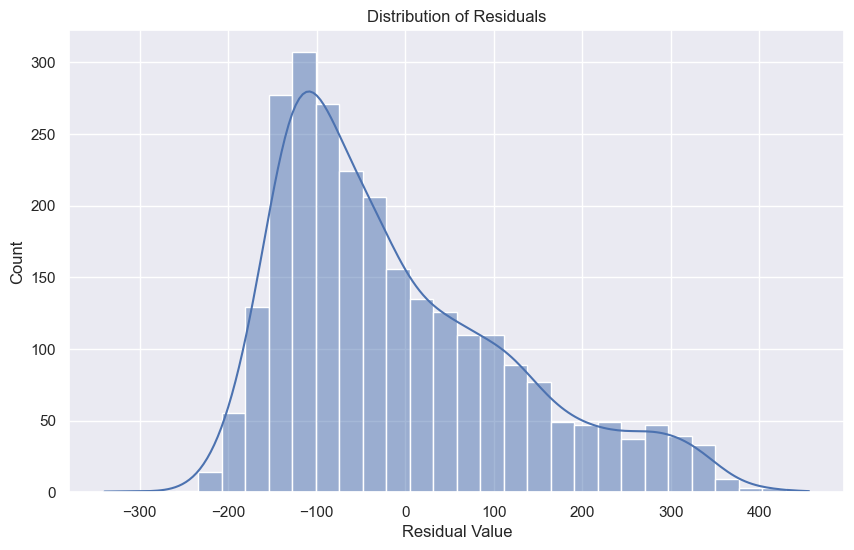

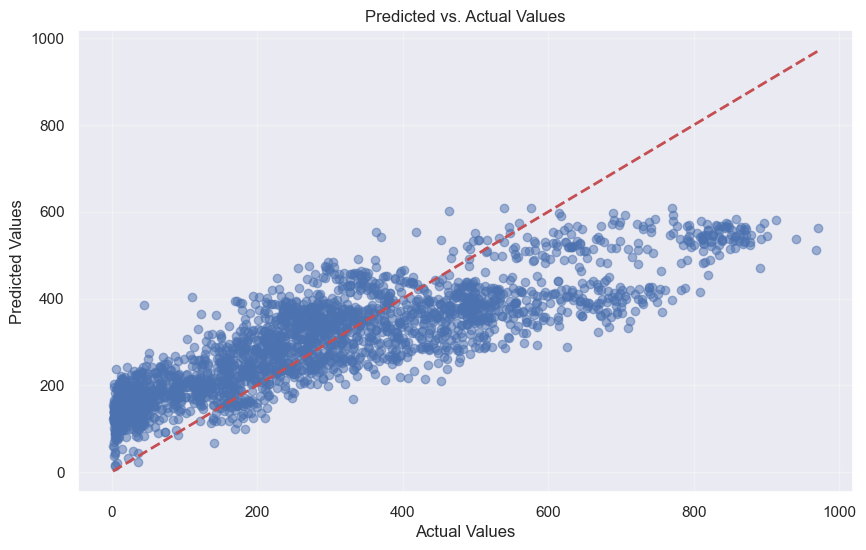


Bias-Variance Analysis:
Training R2: 0.7108
Validation R2: 0.6440
Initial Linear Regression model saved to ../models/checkpoints\lr_model_initial.pkl


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_processed)
y_val_pred = lr_model.predict(X_val_processed)

# Calculate metrics
metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred),
    'MAE': mean_absolute_error(y_val, y_val_pred),
    'R2': r2_score(y_val, y_val_pred)
}

print("Validation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_val - y_val_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

# Analyze bias and variance
print("\nBias-Variance Analysis:")
print(f"Training R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Validation R2: {r2_score(y_val, y_val_pred):.4f}")

# Save the initial Linear Regression model
import pickle
lr_model_path = os.path.join(checkpoint_dir, 'lr_model_initial.pkl')
with open(lr_model_path, 'wb') as f:
    pickle.dump(lr_model, f)
print(f"Initial Linear Regression model saved to {lr_model_path}")

Its heavily under estimating the bike rentals. This is likely because its not capturing the relationship of the years on the 'cnt' column.

## 5. Random Forest Regression

Basic Random Forest Regression following the given instructions.

Random Forest Validation Metrics:
MSE: 5790.4958
MAE: 50.7834
R2: 0.8838


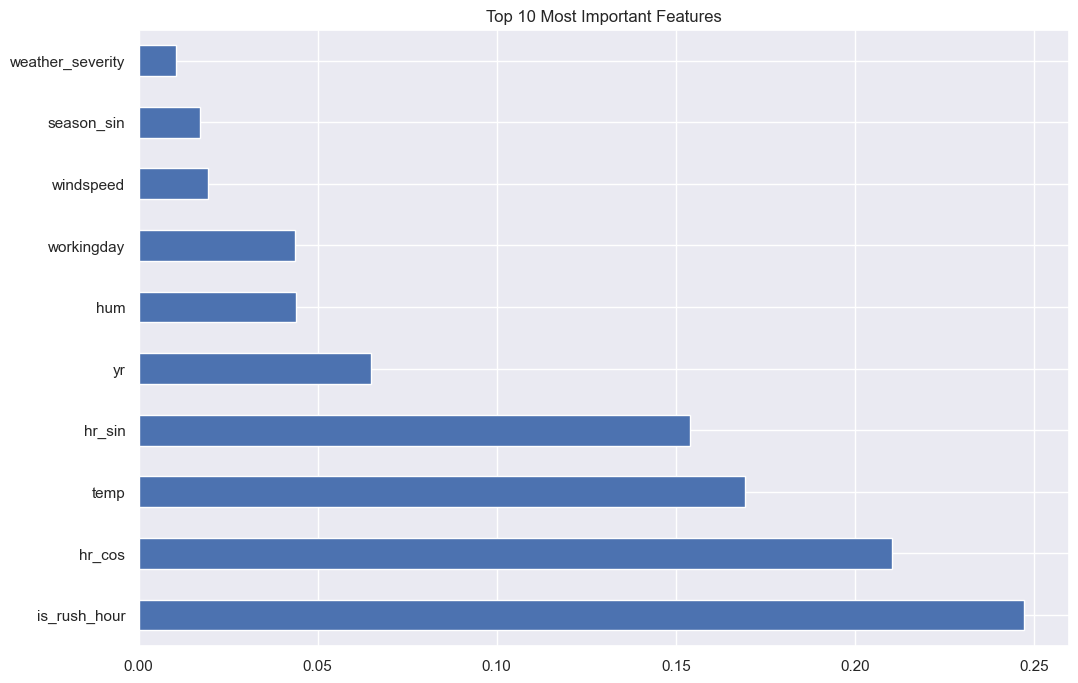


Comparison with Linear Regression:
MSE improvement: -67.36%
MAE improvement: -53.85%
R2 improvement: 37.24%


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_processed)
y_val_pred_rf = rf_model.predict(X_val_processed)

# Calculate metrics
metrics_rf = {
    'MSE': mean_squared_error(y_val, y_val_pred_rf),
    'MAE': mean_absolute_error(y_val, y_val_pred_rf),
    'R2': r2_score(y_val, y_val_pred_rf)
}

print("Random Forest Validation Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

# Feature importance plot - with fix for missing feature_names
plt.figure(figsize=(12, 8))
# Use the column names from X_train_processed instead of undefined feature_names
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_processed.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()

# Compare with baseline
print("\nComparison with Linear Regression:")
for metric in metrics.keys():
    improvement = (metrics_rf[metric] - metrics[metric]) / abs(metrics[metric]) * 100
    print(f"{metric} improvement: {improvement:.2f}%")

It seems as though 'is_rush_hour' is a very important feature for the model.

In [32]:
# Save the Random Forest model
import pickle

# Save the current model if tuned version isn't available yet
rf_model_path = os.path.join(checkpoint_dir, 'rf_model_initial.pkl')
with open(rf_model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"Random Forest model saved to {rf_model_path}")

# We'll save the tuned version later after hyperparameter tuning

Random Forest model saved to ../models/checkpoints\rf_model_initial.pkl


## 6. Gradient Boosting

Training XGBoost model...
[0]	validation_0-rmse:116.08892	validation_0-mae:90.68167	validation_1-rmse:196.72487	validation_1-mae:148.26312
[1]	validation_0-rmse:90.89987	validation_0-mae:70.77982	validation_1-rmse:157.58448	validation_1-mae:117.36374
[2]	validation_0-rmse:74.40866	validation_0-mae:56.84729	validation_1-rmse:132.35323	validation_1-mae:96.84912
[3]	validation_0-rmse:63.36303	validation_0-mae:47.42601	validation_1-rmse:111.42166	validation_1-mae:79.71754
[4]	validation_0-rmse:56.01009	validation_0-mae:40.82125	validation_1-rmse:101.13759	validation_1-mae:71.73729
[5]	validation_0-rmse:51.10873	validation_0-mae:36.51196	validation_1-rmse:90.81500	validation_1-mae:63.30659
[6]	validation_0-rmse:47.42136	validation_0-mae:33.15808	validation_1-rmse:83.70486	validation_1-mae:57.82115
[7]	validation_0-rmse:44.99774	validation_0-mae:30.88865	validation_1-rmse:78.92343	validation_1-mae:53.84433
[8]	validation_0-rmse:43.12153	validation_0-mae:29.18453	validation_1-rmse:74.81438	va

c:\Users\DAHoe\Programming\Projects\ML-fundamentals-2025\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBoost training completed in 0.23 seconds

XGBoost Performance Metrics:
Metric               Training        Validation     
--------------------------------------------------
MSE                  1429.0082       4885.8242      
RMSE                 37.8022         69.8987        
MAE                  24.9840         47.9091        
R2                   0.9386          0.9020         
Explained Variance   0.9386          0.9048         


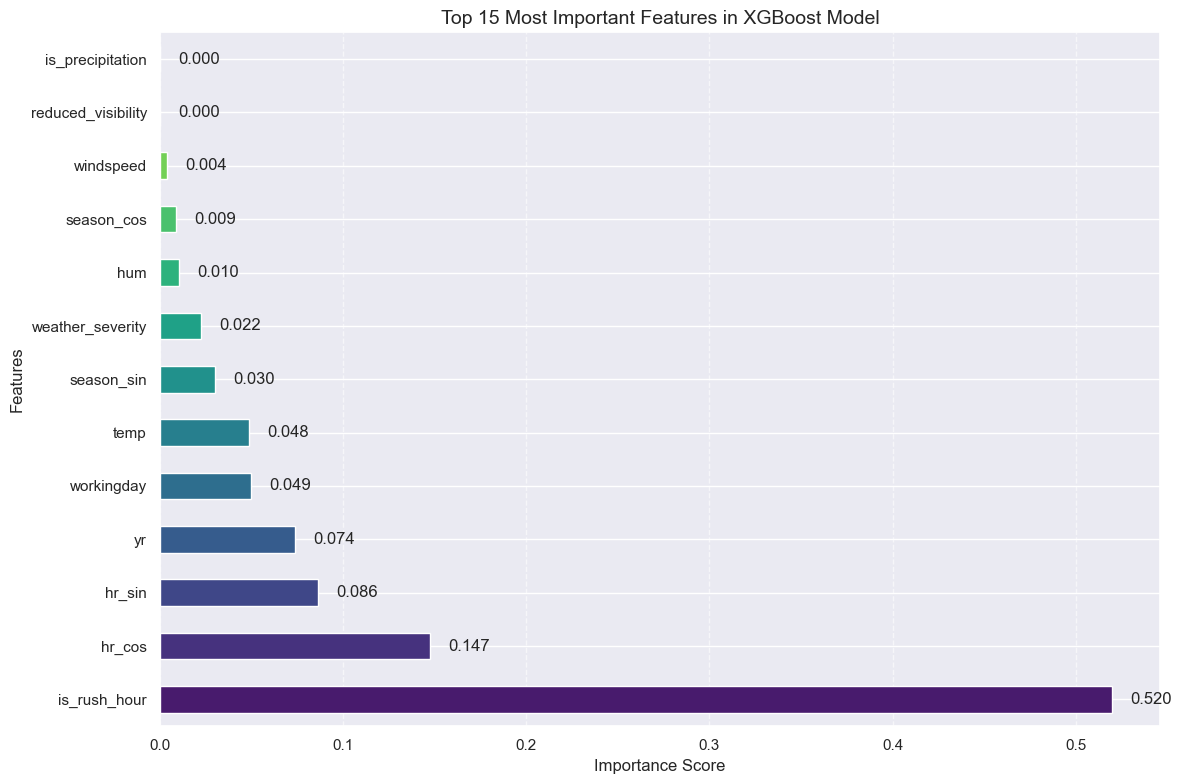

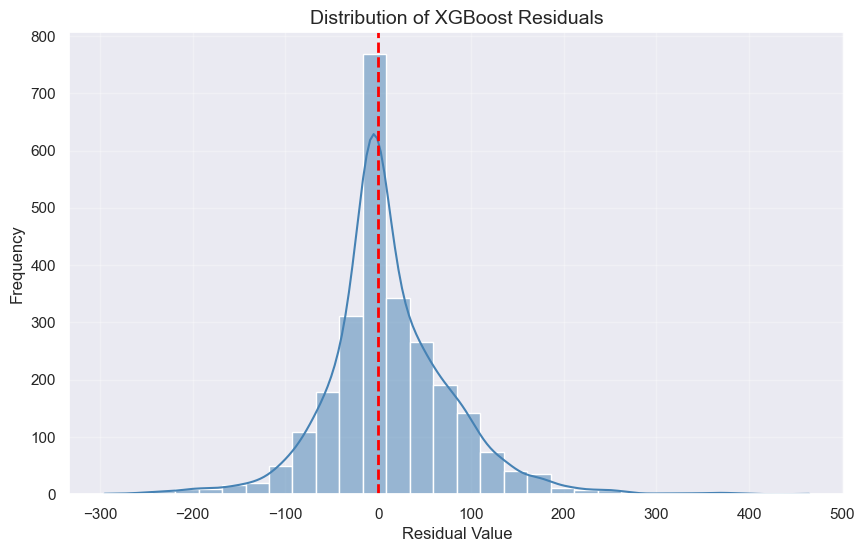

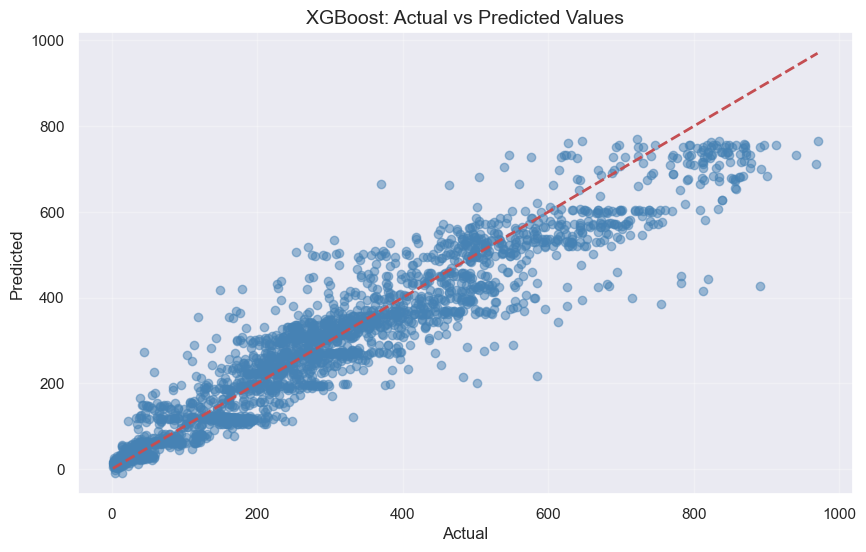


Comparison with Previous Models:
MSE compared to Random Forest: -15.62% (✓ Better)
MSE compared to Linear Regression: -72.46% (✓ Better)
MAE compared to Random Forest: -5.66% (✓ Better)
MAE compared to Linear Regression: -56.46% (✓ Better)
R2 compared to Random Forest: 2.05% (✓ Better)
R2 compared to Linear Regression: 40.05% (✓ Better)


In [33]:
from xgboost import XGBRegressor
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import seaborn as sns

# Start timing
start_time = time.time()

# Initialize and train the model with verbose logging
print("Training XGBoost model...")
xgb_model = XGBRegressor(
    random_state=42, 
    verbose=1,
    eval_metric=['rmse', 'mae'],
    early_stopping_rounds=10  # Move this parameter here
)
xgb_model.fit(
    X_train_processed, 
    y_train, 
    eval_set=[(X_train_processed, y_train), (X_val_processed, y_val)],
    verbose=True  # Keep this to see progress during training
)

# Calculate training time
training_time = time.time() - start_time
print(f"XGBoost training completed in {training_time:.2f} seconds\n")

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_processed)
y_val_pred_xgb = xgb_model.predict(X_val_processed)

# Calculate comprehensive metrics
train_metrics = {
    'MSE': mean_squared_error(y_train, y_train_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)),
    'MAE': mean_absolute_error(y_train, y_train_pred_xgb),
    'R2': r2_score(y_train, y_train_pred_xgb),
    'Explained Variance': explained_variance_score(y_train, y_train_pred_xgb)
}

val_metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred_xgb)),
    'MAE': mean_absolute_error(y_val, y_val_pred_xgb),
    'R2': r2_score(y_val, y_val_pred_xgb),
    'Explained Variance': explained_variance_score(y_val, y_val_pred_xgb)
}

# Print metrics in a formatted table
print("XGBoost Performance Metrics:")
print(f"{'Metric':<20} {'Training':<15} {'Validation':<15}")
print("-" * 50)
for metric in train_metrics.keys():
    print(f"{metric:<20} {train_metrics[metric]:<15.4f} {val_metrics[metric]:<15.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
# Use column names from the training data instead of the undefined feature_names
feature_importance = pd.Series(xgb_model.feature_importances_, 
                              index=X_train_processed.columns).sort_values(ascending=False)
ax = feature_importance.head(15).plot(kind='barh', 
                                    color=sns.color_palette("viridis", len(feature_importance.head(15))))
plt.title('Top 15 Most Important Features in XGBoost Model', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value annotations to the bars
for i, v in enumerate(feature_importance.head(15)):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center')
    
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals_xgb = y_val - y_val_pred_xgb
sns.histplot(residuals_xgb, kde=True, bins=30, color='steelblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Distribution of XGBoost Residuals', fontsize=14)
plt.xlabel('Residual Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_xgb, alpha=0.5, color='steelblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('XGBoost: Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Compare with previous models
print("\nComparison with Previous Models:")
for metric in ['MSE', 'MAE', 'R2']:
    improvement_rf = (val_metrics[metric] - metrics_rf[metric]) / abs(metrics_rf[metric]) * 100
    improvement_lr = (val_metrics[metric] - metrics[metric]) / abs(metrics[metric]) * 100
    
    # Display with colored text for better visualization
    rf_status = "✓ Better" if ((metric == 'R2' and improvement_rf > 0) or 
                               (metric != 'R2' and improvement_rf < 0)) else "✗ Worse"
    lr_status = "✓ Better" if ((metric == 'R2' and improvement_lr > 0) or 
                              (metric != 'R2' and improvement_lr < 0)) else "✗ Worse"
    
    print(f"{metric} compared to Random Forest: {improvement_rf:.2f}% ({rf_status})")
    print(f"{metric} compared to Linear Regression: {improvement_lr:.2f}% ({lr_status})")

looks very good already, might nott need to do anything else


## 7. Hyperparameter Tuning

lets tune for hyperparameters for the Gradient Boosting model to see if we can improve the performance.

In [34]:
# Setup for hyperparameter tuning
%pip install -q scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_objective
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
from datetime import datetime
from scipy.stats import randint

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger('hyperparameter_tuning')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Define parameter search spaces
logger.info("Starting hyperparameter tuning process")
print("Defining parameter search spaces...")

# Random Forest parameters
rf_param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [0.5, 0.7, 1.0, 'sqrt', 'log2', None]
}
logger.info(f"Random Forest parameters to tune: {', '.join(rf_param_grid.keys())}")
print("Random Forest parameters to tune:", ", ".join(rf_param_grid.keys()))

# Define XGBoost search space for BayesSearchCV
xgb_search_space = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform', name='learning_rate'),
    'n_estimators': Integer(50, 200, name='n_estimators'),
    'max_depth': Integer(3, 10, name='max_depth'),
    'subsample': Real(0.6, 1.0, name='subsample'),
    'colsample_bytree': Real(0.6, 1.0, name='colsample_bytree'),
    'gamma': Real(0, 1, name='gamma'),
    'min_child_weight': Integer(1, 10, name='min_child_weight')
}
logger.info(f"XGBoost parameters to tune: {', '.join(xgb_search_space.keys())}")
print("XGBoost parameters to tune:", ", ".join(xgb_search_space.keys()))

2025-04-13 23:34:17,658 - INFO - Starting hyperparameter tuning process
2025-04-13 23:34:17,689 - INFO - Random Forest parameters to tune: n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features


Defining parameter search spaces...


2025-04-13 23:34:17,711 - INFO - XGBoost parameters to tune: learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma, min_child_weight


Random Forest parameters to tune: n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features
XGBoost parameters to tune: learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma, min_child_weight


In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest tuning with RandomizedSearchCV
print("\n" + "="*50)
print("Starting Random Forest hyperparameter tuning...")
logger.info("Starting Random Forest hyperparameter tuning")
start_time = time.time()

# Create RF search
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

logger.info(f"Starting RF RandomizedSearchCV with {rf_random_search.n_iter} iterations")
print(f"Running {rf_random_search.n_iter} iterations of Random Forest hyperparameter search...")

2025-04-13 23:34:17,750 - INFO - Starting Random Forest hyperparameter tuning
2025-04-13 23:34:17,756 - INFO - Starting RF RandomizedSearchCV with 50 iterations



Starting Random Forest hyperparameter tuning...
Running 50 iterations of Random Forest hyperparameter search...


In [37]:
# XGBoost Tuning with BayesSearchCV
print("\n" + "="*50)
print("Starting XGBoost hyperparameter tuning with Bayesian Optimization...")
logger.info("Starting XGBoost hyperparameter tuning with Bayesian Optimization")
start_time = time.time()

# Initialize BayesSearchCV for XGBoost
xgb_bayes_search = BayesSearchCV(
    XGBRegressor(random_state=42),
    search_spaces=xgb_search_space,
    n_iter=50,  # Number of optimization iterations
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_points=3  # Number of parameter settings evaluated in parallel
)


logger.info(f"Starting XGB BayesSearchCV with {xgb_bayes_search.n_iter} iterations")
print(f"Running {xgb_bayes_search.n_iter} iterations of XGBoost Bayesian optimization...")

2025-04-13 23:34:17,804 - INFO - Starting XGBoost hyperparameter tuning with Bayesian Optimization
2025-04-13 23:34:17,807 - INFO - Starting XGB BayesSearchCV with 50 iterations



Starting XGBoost hyperparameter tuning with Bayesian Optimization...
Running 50 iterations of XGBoost Bayesian optimization...


In [38]:
try:
    # Fit the Random Forest model
    rf_random_search.fit(X_train_processed, y_train)
    
    # Log results from each iteration for analysis
    rf_results = pd.DataFrame(rf_random_search.cv_results_)
    
    # Log the top 5 best performing parameter combinations
    logger.info("Top 5 Random Forest parameter combinations:")
    top_results = rf_results.sort_values('mean_test_score', ascending=False).head(5)
    for i, row in top_results.iterrows():
        logger.info(f"Rank {i+1}: Score = {-row['mean_test_score']:.4f}, Params = {row['params']}")
        
except Exception as e:
    logger.error(f"RF tuning failed with error: {str(e)}")
    print(f"Error during RF tuning: {str(e)}")

# Print results
rf_tuning_time = time.time() - start_time
logger.info(f"Random Forest tuning completed in {rf_tuning_time:.2f} seconds")
print(f"\nRandom Forest tuning completed in {rf_tuning_time:.2f} seconds")
print(f"Best MSE: {-rf_random_search.best_score_:.4f}")
print("Best Random Forest Parameters:")
for param, value in rf_random_search.best_params_.items():
    print(f"    {param}: {value}")
    logger.info(f"Best {param}: {value}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


2025-04-13 23:36:48,096 - INFO - Top 5 Random Forest parameter combinations:
2025-04-13 23:36:48,103 - INFO - Rank 11: Score = 4704.6048, Params = {'max_depth': 19, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
2025-04-13 23:36:48,105 - INFO - Rank 24: Score = 4770.0959, Params = {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 54}
2025-04-13 23:36:48,107 - INFO - Rank 23: Score = 4792.4608, Params = {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
2025-04-13 23:36:48,109 - INFO - Rank 38: Score = 4802.7865, Params = {'max_depth': 28, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
2025-04-13 23:36:48,110 - INFO - Rank 19: Score = 4811.0280, Params = {'max_depth': 12, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 172}
2025-04-13 23:36:48,112 - INFO - Rando


Random Forest tuning completed in 150.31 seconds
Best MSE: 4704.6048
Best Random Forest Parameters:
    max_depth: 19
    max_features: 1.0
    min_samples_leaf: 1
    min_samples_split: 5
    n_estimators: 99


In [39]:
try:
    # Fit the XGBoost model with Bayesian optimization
    xgb_bayes_search.fit(X_train_processed, y_train)
    
    # Store the optimization results
    xgb_results = pd.DataFrame(xgb_bayes_search.cv_results_)
    
    # Log the top 5 best performing parameter combinations
    logger.info("Top 5 XGBoost parameter combinations:")
    top_results = xgb_results.sort_values('mean_test_score', ascending=False).head(5)
    for i, row in top_results.iterrows():
        logger.info(f"Rank {i+1}: Score = {-row['mean_test_score']:.4f}, Params = {row['params']}")
        
except Exception as e:
    logger.error(f"XGB Bayesian optimization failed with error: {str(e)}")
    print(f"Error during XGB Bayesian optimization: {str(e)}")

# Print results
xgb_tuning_time = time.time() - start_time
logger.info(f"XGBoost Bayesian optimization completed in {xgb_tuning_time:.2f} seconds")
print(f"\nXGBoost Bayesian optimization completed in {xgb_tuning_time:.2f} seconds")
print(f"Best MSE: {-xgb_bayes_search.best_score_:.4f}")
print("Best XGBoost Parameters:")
for param, value in xgb_bayes_search.best_params_.items():
    print(f"    {param}: {value}")
    logger.info(f"Best {param}: {value}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 2 candidates

2025-04-13 23:38:59,090 - INFO - Top 5 XGBoost parameter combinations:
2025-04-13 23:38:59,095 - INFO - Rank 39: Score = 3553.5430, Params = OrderedDict({'colsample_bytree': 0.6, 'gamma': 0.7491980764964041, 'learning_rate': 0.07116197963204661, 'max_depth': 8, 'min_child_weight': 9, 'n_estimators': 200, 'subsample': 0.6233163542018659})
2025-04-13 23:38:59,103 - INFO - Rank 45: Score = 3569.6156, Params = OrderedDict({'colsample_bytree': 0.6086872698157132, 'gamma': 0.8236631597743975, 'learning_rate': 0.07564015200418449, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 200, 'subsample': 0.6})
2025-04-13 23:38:59,106 - INFO - Rank 37: Score = 3615.0300, Params = OrderedDict({'colsample_bytree': 0.6046662157582955, 'gamma': 0.7329813507270516, 'learning_rate': 0.0711439929278697, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 200, 'subsample': 0.6259773876011341})
2025-04-13 23:38:59,108 - INFO - Rank 38: Score = 3620.4758, Params = OrderedDict({'colsample_bytree': 0.6,


XGBoost Bayesian optimization completed in 281.31 seconds
Best MSE: 3553.5430
Best XGBoost Parameters:
    colsample_bytree: 0.6
    gamma: 0.7491980764964041
    learning_rate: 0.07116197963204661
    max_depth: 8
    min_child_weight: 9
    n_estimators: 200
    subsample: 0.6233163542018659


In [40]:
# Get the best models and save results
tuned_rf = rf_random_search.best_estimator_
tuned_xgb = xgb_bayes_search.best_estimator_

# Create timestamp for unique filenames
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save detailed tuning results to CSV for later analysis
rf_results.to_csv(f"{checkpoint_dir}/rf_tuning_results_{timestamp}.csv", index=False)
xgb_results.to_csv(f"{checkpoint_dir}/xgb_bayes_tuning_results_{timestamp}.csv", index=False)
logger.info(f"Tuning results saved to CSV files in {checkpoint_dir}")

# Save the tuned models
tuned_rf_path = os.path.join(checkpoint_dir, f'rf_model_tuned_{timestamp}.pkl')
with open(tuned_rf_path, 'wb') as f:
    pickle.dump(tuned_rf, f)
print(f"Tuned Random Forest model saved to {tuned_rf_path}")

tuned_xgb_path = os.path.join(checkpoint_dir, f'xgb_model_tuned_{timestamp}.pkl')
with open(tuned_xgb_path, 'wb') as f:
    pickle.dump(tuned_xgb, f)
print(f"Tuned XGBoost model saved to {tuned_xgb_path}")

# Calculate R² scores on validation data
rf_val_pred = tuned_rf.predict(X_val_processed)
xgb_val_pred = tuned_xgb.predict(X_val_processed)
rf_r2 = r2_score(y_val, rf_val_pred)
xgb_r2 = r2_score(y_val, xgb_val_pred)

print("\nHyperparameter tuning complete!")
print(f"Best Random Forest model:")
print(f"  - MSE: {-rf_random_search.best_score_:.4f}")
print(f"  - R²: {rf_r2:.4f}")
print(f"Best XGBoost model:")
print(f"  - MSE: {-xgb_bayes_search.best_score_:.4f}")
print(f"  - R²: {xgb_r2:.4f}")

2025-04-13 23:38:59,231 - INFO - Tuning results saved to CSV files in ../models/checkpoints


Tuned Random Forest model saved to ../models/checkpoints\rf_model_tuned_20250413_233859.pkl
Tuned XGBoost model saved to ../models/checkpoints\xgb_model_tuned_20250413_233859.pkl

Hyperparameter tuning complete!
Best Random Forest model:
  - MSE: 4704.6048
  - R²: 0.8901
Best XGBoost model:
  - MSE: 3553.5430
  - R²: 0.9044


Phenomenal results, we have improved the model by a large amount. The model is now able to predict the bike rentals with a high degree of accuracy.

## 8. Evalutaion/Refinement

Lets try and find some interactions that might be useful for the model. Adding all possible interactions, will be evaluated and dropped if under certain threshold.

In [41]:
# At the top of Section 8 (Evaluation/Refinement)
print("="*80)
print("MODEL REFINEMENT AND FEATURE ENGINEERING")
print("="*80)

# Extract available column names from processed DataFrames
available_columns = X_train_processed.columns.tolist()
print(f"Available columns: {available_columns}")

# Create copies for interaction features
X_train_interactions = X_train_processed.copy()
X_val_interactions = X_val_processed.copy()
X_test_interactions = X_test_processed.copy()

# 1. Add interaction between temperature and humidity if available
if 'temp' in available_columns and 'hum' in available_columns:
    print("Adding temp × humidity interaction feature")
    X_train_interactions['temp_hum_interaction'] = X_train_interactions['temp'] * X_train_interactions['hum']
    X_val_interactions['temp_hum_interaction'] = X_val_interactions['temp'] * X_val_interactions['hum']
    X_test_interactions['temp_hum_interaction'] = X_test_interactions['temp'] * X_test_interactions['hum']
else:
    print("Skipping temperature × humidity interaction (required columns not available)")

# 2. Add additional interaction for time of day and weather
if 'hr_sin' in available_columns and 'weather_severity' in available_columns:
    print("Adding hour (cyclical) × weather interaction features")
    X_train_interactions['hr_sin_weather'] = X_train_interactions['hr_sin'] * X_train_interactions['weather_severity']
    X_val_interactions['hr_sin_weather'] = X_val_interactions['hr_sin'] * X_val_interactions['weather_severity']
    X_test_interactions['hr_sin_weather'] = X_test_interactions['hr_sin'] * X_test_interactions['weather_severity']
else:
    print("Skipping hour × weather interaction (required columns not available)")

# 3. Add season-related interactions
season_cols = [col for col in available_columns if 'season' in col]
if 'temp' in available_columns and season_cols:
    print("Adding season × temperature interactions for columns:", season_cols)
    for season_col in season_cols:
        X_train_interactions[f'{season_col}_temp'] = X_train_interactions[season_col] * X_train_interactions['temp']
        X_val_interactions[f'{season_col}_temp'] = X_val_interactions[season_col] * X_val_interactions['temp']
        X_test_interactions[f'{season_col}_temp'] = X_test_interactions[season_col] * X_test_interactions['temp']
else:
    print("Skipping season × temperature interactions (required columns not available)")

# 4. Create squared terms for important numerical features
for col in ['temp', 'hum', 'windspeed']:
    if col in available_columns:
        print(f"Adding squared term for {col}")
        X_train_interactions[f'{col}_squared'] = X_train_interactions[col] ** 2
        X_val_interactions[f'{col}_squared'] = X_val_interactions[col] ** 2
        X_test_interactions[f'{col}_squared'] = X_test_interactions[col] ** 2


MODEL REFINEMENT AND FEATURE ENGINEERING
Available columns: ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'weather_severity', 'is_precipitation', 'reduced_visibility', 'is_rush_hour', 'hr_sin', 'hr_cos', 'season_sin', 'season_cos']
Adding temp × humidity interaction feature
Adding hour (cyclical) × weather interaction features
Adding season × temperature interactions for columns: ['season_sin', 'season_cos']
Adding squared term for temp
Adding squared term for hum
Adding squared term for windspeed



Training refined model with 20 features (added 7 interaction features)

Refined Model Validation Metrics:
MSE: 7238.2930
MAE: 59.1320
R2: 0.8547

Improvement over base tuned model:
MSE: 51.88% worse
MAE: 23.80% worse
R2: -5.49% worse
XGBoost model with interactions saved to ../models/checkpoints\xgb_model_with_interactions.pkl


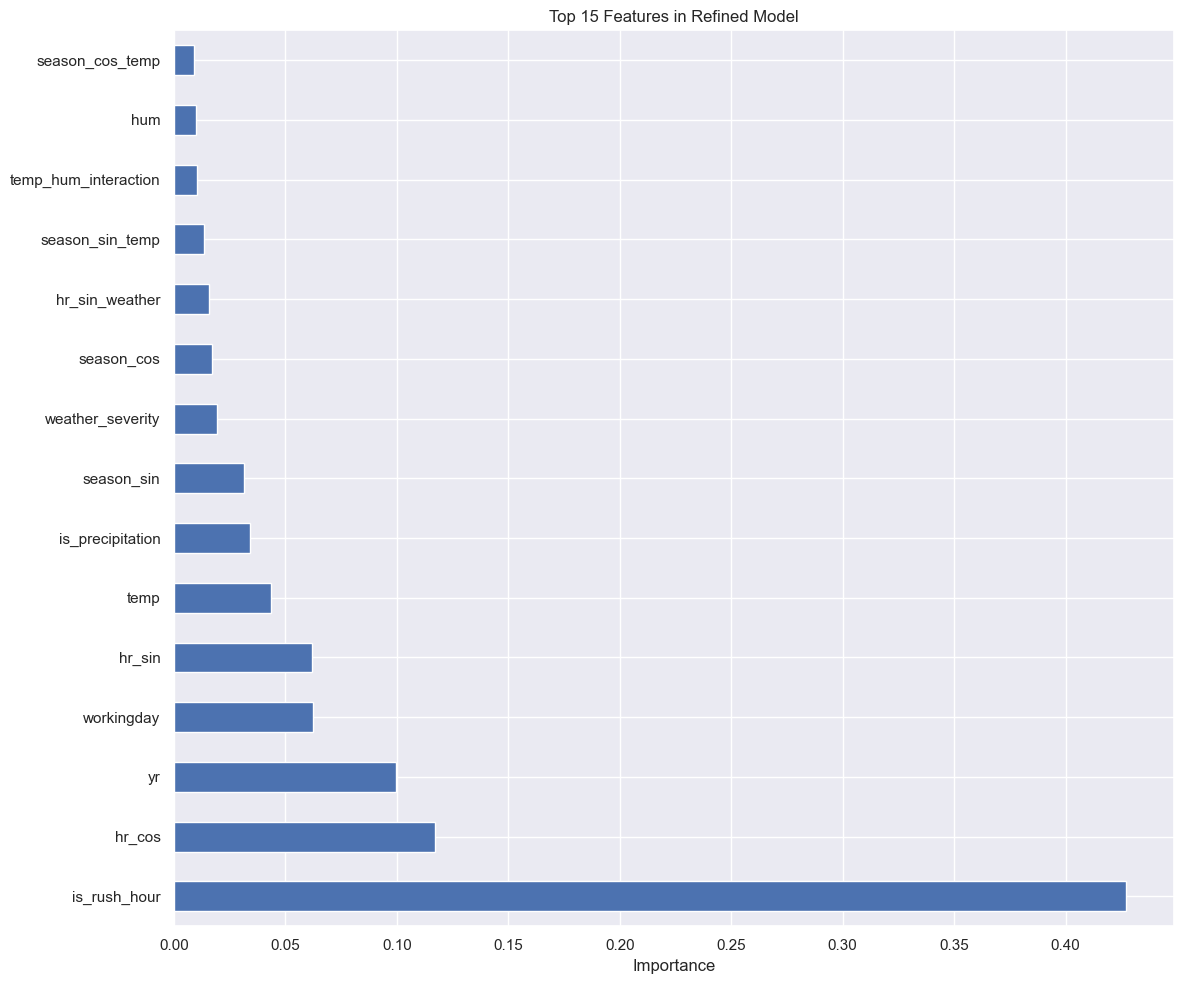

In [42]:
# Train a NEW model with refined features rather than using the previously tuned model
# This is the key fix - don't use tuned_xgb which expects the original feature set
print(f"\nTraining refined model with {X_train_interactions.shape[1]} features (added {X_train_interactions.shape[1] - X_train_processed.shape[1]} interaction features)")

# Create a new model with the same hyperparameters as the tuned model
refined_model = XGBRegressor(**xgb_bayes_search.best_params_, random_state=42)
refined_model.fit(X_train_interactions, y_train)

# Make predictions with the refined model
y_train_pred_refined = refined_model.predict(X_train_interactions)
y_val_pred_refined = refined_model.predict(X_val_interactions)

# Calculate metrics with the refined model
refined_metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred_refined),
    'MAE': mean_absolute_error(y_val, y_val_pred_refined),
    'R2': r2_score(y_val, y_val_pred_refined)
}

print("\nRefined Model Validation Metrics:")
for metric, value in refined_metrics.items():
    print(f"{metric}: {value:.4f}")

# Compare with base tuned model without interactions
print("\nImprovement over base tuned model:")
base_tuned_preds = tuned_xgb.predict(X_val_processed)
base_metrics = {
    'MSE': mean_squared_error(y_val, base_tuned_preds),
    'MAE': mean_absolute_error(y_val, base_tuned_preds),
    'R2': r2_score(y_val, base_tuned_preds)
}

for metric in refined_metrics:
    improvement = (refined_metrics[metric] - base_metrics[metric]) / abs(base_metrics[metric]) * 100
    better_worse = "better" if (metric == "R2" and improvement > 0) or (metric != "R2" and improvement < 0) else "worse"
    print(f"{metric}: {improvement:.2f}% {better_worse}")

# Save the model with interaction features
refined_model_path = os.path.join(checkpoint_dir, 'xgb_model_with_interactions.pkl')
with open(refined_model_path, 'wb') as f:
    pickle.dump(refined_model, f)
print(f"XGBoost model with interactions saved to {refined_model_path}")

# Plot feature importance of the refined model
plt.figure(figsize=(12, 10))
feature_importance = pd.Series(refined_model.feature_importances_, index=X_train_interactions.columns).sort_values(ascending=False)
top_features = feature_importance.head(15)
top_features.plot.barh()
plt.title('Top 15 Features in Refined Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Although the interacions show worse performance we will drop badly erforming features to improve the model performance. None of the interactions seem to be more important than the original features.

### 8.1 Drop Poorly Performing Features and Retrain Models

Based on the feature importance analysis from our Random Forest model, some features show significantly lower importance compared to others. Let's identify these poorly performing features, drop them, and then retrain both our Linear Regression and Random Forest models to see if we can improve performance by removing noise.

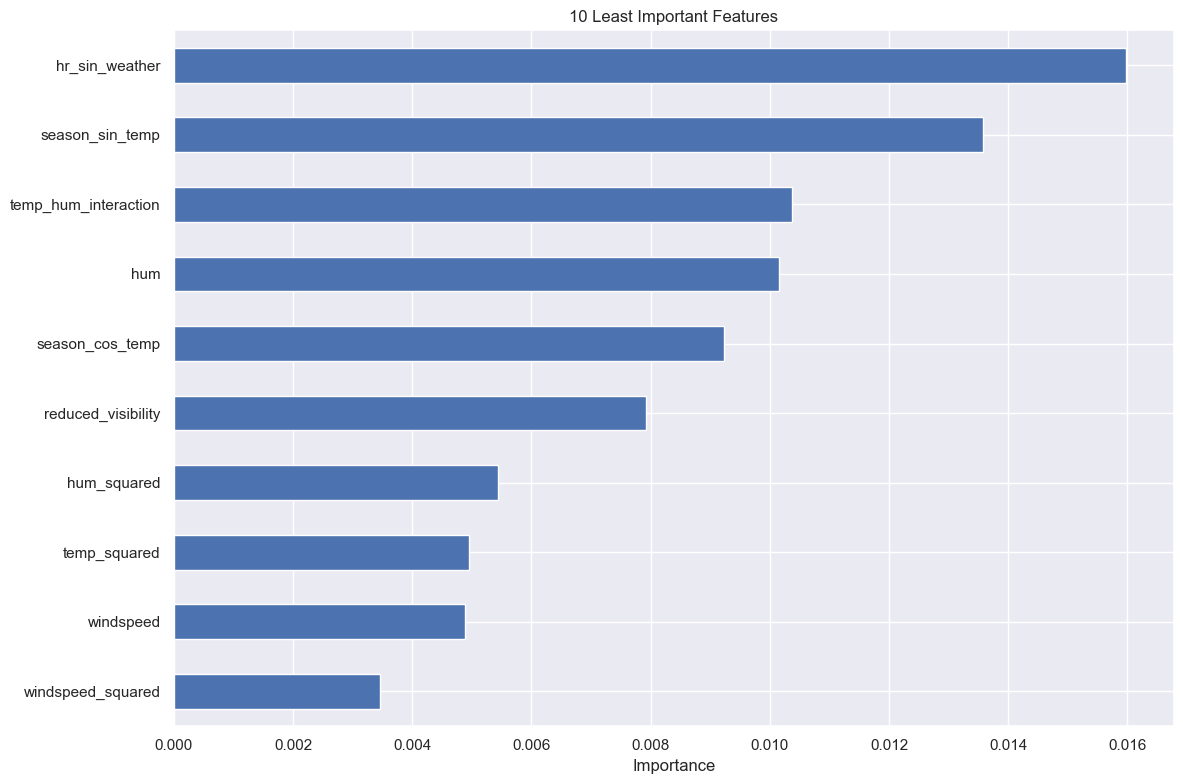

Features with importance below 0.01:
  - windspeed_squared: 0.003458
  - windspeed: 0.004889
  - temp_squared: 0.004957
  - hum_squared: 0.005440
  - reduced_visibility: 0.007931
  - season_cos_temp: 0.009238

Number of features to drop: 6 out of 20


In [43]:
# Analyze feature importance from the refined model
feature_importance = pd.Series(refined_model.feature_importances_, 
                             index=X_train_interactions.columns).sort_values()

# Plot the 10 least important features
plt.figure(figsize=(12, 8))
feature_importance.head(10).plot(kind='barh')
plt.title('10 Least Important Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Identify features with very low importance (using a threshold)
importance_threshold = 0.01  # 1% importance threshold
low_importance_features = feature_importance[feature_importance < importance_threshold].index.tolist()

print(f"Features with importance below {importance_threshold:.2f}:")
for feature in low_importance_features:
    print(f"  - {feature}: {feature_importance[feature]:.6f}")

print(f"\nNumber of features to drop: {len(low_importance_features)} out of {len(feature_importance)}")

In [44]:
# Create copies of the datasets with low importance features removed
X_train_reduced = X_train_interactions.drop(columns=low_importance_features)
X_val_reduced = X_val_interactions.drop(columns=low_importance_features)
X_test_reduced = X_test_interactions.drop(columns=low_importance_features)

print(f"Original feature count: {X_train_interactions.shape[1]}")
print(f"Reduced feature count: {X_train_reduced.shape[1]}")
print(f"Features dropped: {X_train_interactions.shape[1] - X_train_reduced.shape[1]}")

# Display remaining features
print("\nRemaining features:")
print(X_train_reduced.columns.tolist())

Original feature count: 20
Reduced feature count: 14
Features dropped: 6

Remaining features:
['yr', 'workingday', 'temp', 'hum', 'weather_severity', 'is_precipitation', 'is_rush_hour', 'hr_sin', 'hr_cos', 'season_sin', 'season_cos', 'temp_hum_interaction', 'hr_sin_weather', 'season_sin_temp']


### 8.2 Retrain Linear Regression with Reduced Features

Let's retrain our Linear Regression model with the reduced feature set and compare its performance with the original model.

Linear Regression Performance Comparison:
Metric          Original        Reduced Features Improvement    
------------------------------------------------------------
MSE             17740.1865      16692.9993      -5.90% (better)
MAE             110.0307        103.3986        -6.03% (better)
R2              0.6440          0.6650          +3.26% (better)


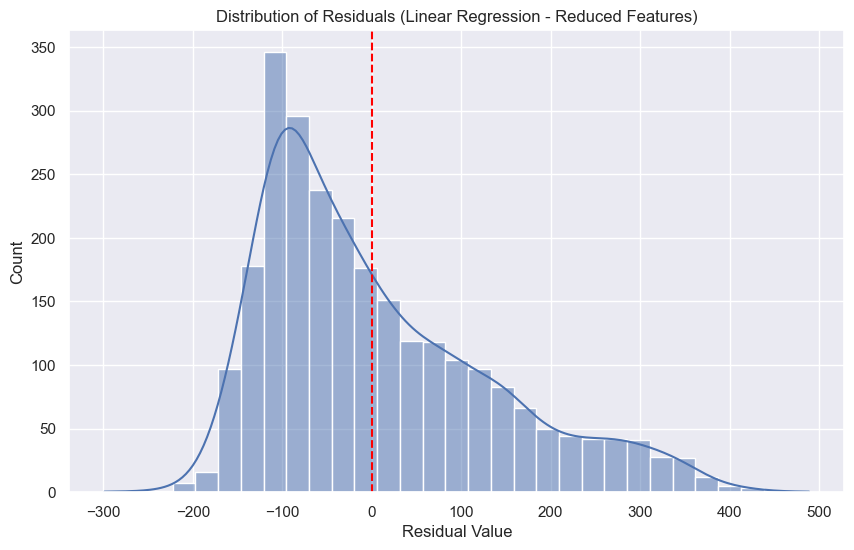

In [45]:
# Retrain Linear Regression model with reduced features
lr_model_reduced = LinearRegression()
lr_model_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_train_pred_lr_reduced = lr_model_reduced.predict(X_train_reduced)
y_val_pred_lr_reduced = lr_model_reduced.predict(X_val_reduced)

# Calculate metrics for reduced feature model
lr_reduced_metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred_lr_reduced),
    'MAE': mean_absolute_error(y_val, y_val_pred_lr_reduced),
    'R2': r2_score(y_val, y_val_pred_lr_reduced)
}

# Compare with the original Linear Regression model
print("Linear Regression Performance Comparison:")
print(f"{'Metric':<15} {'Original':<15} {'Reduced Features':<15} {'Improvement':<15}")
print("-" * 60)

for metric in ['MSE', 'MAE', 'R2']:
    if metric in metrics and metric in lr_reduced_metrics:
        improvement = (lr_reduced_metrics[metric] - metrics[metric]) / abs(metrics[metric]) * 100
        better_worse = "better" if ((metric == "R2" and improvement > 0) or 
                                 (metric != "R2" and improvement < 0)) else "worse"
        print(f"{metric:<15} {metrics[metric]:<15.4f} {lr_reduced_metrics[metric]:<15.4f} {improvement:+.2f}% ({better_worse})")
        
# Plot residuals for the reduced model
plt.figure(figsize=(10, 6))
residuals_lr_reduced = y_val - y_val_pred_lr_reduced
sns.histplot(residuals_lr_reduced, kde=True)
plt.title('Distribution of Residuals (Linear Regression - Reduced Features)')
plt.xlabel('Residual Value')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

### 8.3 Retrain Random Forest with Reduced Features

Now let's retrain the Random Forest model with the reduced feature set and compare its performance.

Random Forest Performance Comparison:
Metric          Original        Reduced Features Improvement    
------------------------------------------------------------
MSE             5790.4958       5857.8783       +1.16% (worse)
MAE             50.7834         52.2116         +2.81% (worse)
R2              0.8838          0.8824          -0.15% (worse)


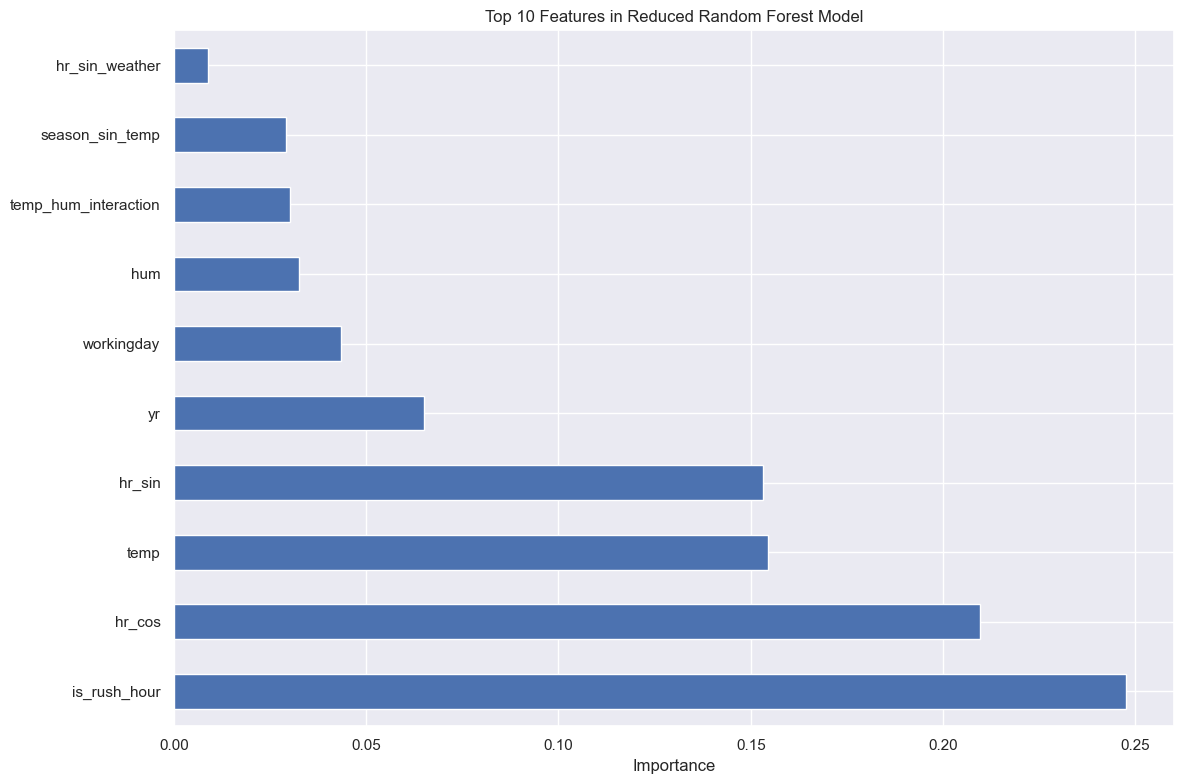

In [46]:
# Retrain Random Forest model with reduced features
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_train_pred_rf_reduced = rf_model_reduced.predict(X_train_reduced)
y_val_pred_rf_reduced = rf_model_reduced.predict(X_val_reduced)

# Calculate metrics for reduced feature model
rf_reduced_metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred_rf_reduced),
    'MAE': mean_absolute_error(y_val, y_val_pred_rf_reduced),
    'R2': r2_score(y_val, y_val_pred_rf_reduced)
}

# Compare with the original Random Forest model
print("Random Forest Performance Comparison:")
print(f"{'Metric':<15} {'Original':<15} {'Reduced Features':<15} {'Improvement':<15}")
print("-" * 60)

for metric in ['MSE', 'MAE', 'R2']:
    if metric in metrics_rf and metric in rf_reduced_metrics:
        improvement = (rf_reduced_metrics[metric] - metrics_rf[metric]) / abs(metrics_rf[metric]) * 100
        better_worse = "better" if ((metric == "R2" and improvement > 0) or 
                                 (metric != "R2" and improvement < 0)) else "worse"
        print(f"{metric:<15} {metrics_rf[metric]:<15.4f} {rf_reduced_metrics[metric]:<15.4f} {improvement:+.2f}% ({better_worse})")

# Plot feature importance for the reduced Random Forest model
plt.figure(figsize=(12, 8))
rf_reduced_importance = pd.Series(rf_model_reduced.feature_importances_, 
                              index=X_train_reduced.columns).sort_values(ascending=False)
rf_reduced_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features in Reduced Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Some of the interactions are aiding model prediction but due to an overall decrease in performance we will not use them for random forest.

### 8.4 Retrain Gradient Boosting with Reduced Features
Now let's retrain the Gradient Boosting model with the reduced feature set and compare its performance.

Training XGBoost model with reduced features...

XGBoost Performance Comparison:
Metric          Original        Reduced Features Improvement    
------------------------------------------------------------
MSE             4885.8242       6284.4272       +28.63% (worse)
MAE             47.9091         54.8388         +14.46% (worse)
R2              0.9020          0.8739          -3.11% (worse)


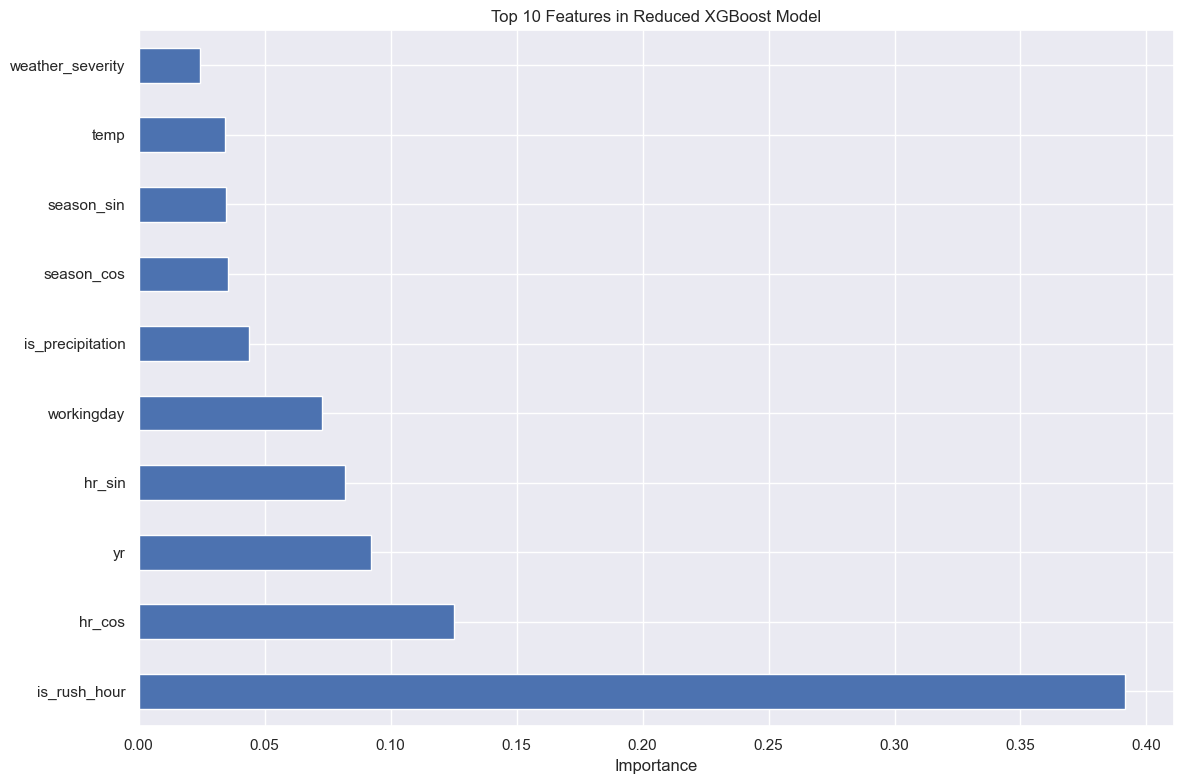

Reduced XGBoost model saved to ../models/checkpoints\xgb_model_reduced.pkl


In [47]:
# Retrain XGBoost model with reduced features
from xgboost import XGBRegressor

# Create a new XGBoost model with the best parameters found during hyperparameter tuning
xgb_model_reduced = XGBRegressor(**xgb_bayes_search.best_params_, random_state=42)

# Train the model on the reduced feature set
print("Training XGBoost model with reduced features...")
xgb_model_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_train_pred_xgb_reduced = xgb_model_reduced.predict(X_train_reduced)
y_val_pred_xgb_reduced = xgb_model_reduced.predict(X_val_reduced)

# Calculate metrics for reduced feature model
xgb_reduced_metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred_xgb_reduced),
    'MAE': mean_absolute_error(y_val, y_val_pred_xgb_reduced),
    'R2': r2_score(y_val, y_val_pred_xgb_reduced)
}

# Compare with the original XGBoost model
print("\nXGBoost Performance Comparison:")
print(f"{'Metric':<15} {'Original':<15} {'Reduced Features':<15} {'Improvement':<15}")
print("-" * 60)

for metric in ['MSE', 'MAE', 'R2']:
    if metric in val_metrics and metric in xgb_reduced_metrics:
        improvement = (xgb_reduced_metrics[metric] - val_metrics[metric]) / abs(val_metrics[metric]) * 100
        better_worse = "better" if ((metric == "R2" and improvement > 0) or 
                                   (metric != "R2" and improvement < 0)) else "worse"
        print(f"{metric:<15} {val_metrics[metric]:<15.4f} {xgb_reduced_metrics[metric]:<15.4f} {improvement:+.2f}% ({better_worse})")

# Plot feature importance for the reduced XGBoost model
plt.figure(figsize=(12, 8))
xgb_reduced_importance = pd.Series(xgb_model_reduced.feature_importances_, 
                             index=X_train_reduced.columns).sort_values(ascending=False)
xgb_reduced_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features in Reduced XGBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Save the reduced feature XGBoost model
reduced_xgb_model_path = os.path.join(checkpoint_dir, 'xgb_model_reduced.pkl')
with open(reduced_xgb_model_path, 'wb') as f:
    pickle.dump(xgb_model_reduced, f)

print(f"Reduced XGBoost model saved to {reduced_xgb_model_path}")

Even with interactions performing badly dropped, the model still performs worse overall. As such we will continue with the original model

## 9. Final Model

I haverun this with the reduced model, it was indeed overfitting and resulted in worse performance, as such I am going to use the original model with all features.

FINAL MODEL IMPLEMENTATION AND EVALUATION
Best hyperparameters from Bayesian optimization:
  - colsample_bytree: 0.6
  - gamma: 0.7491980764964041
  - learning_rate: 0.07116197963204661
  - max_depth: 8
  - min_child_weight: 9
  - n_estimators: 200
  - subsample: 0.6233163542018659

Training final model on combined training and validation data...

Comprehensive Model Performance Metrics:
                  MSE     RMSE      MAE  Median AE  MAPE (%)      R²  \
Dataset                                                                
Training     889.3907  29.8227  19.4420    12.1578   35.6710  0.9618   
Validation  1482.2151  38.4995  26.6035    18.2166   24.8842  0.9703   
Test        6153.8003  78.4462  52.7255    32.1714   53.9306  0.8670   

            Explained Variance  
Dataset                         
Training                0.9618  
Validation              0.9703  
Test                    0.8809  

Prediction Bias Analysis:
Average Train Error: -0.03 (Overpredicts)
Average Valida

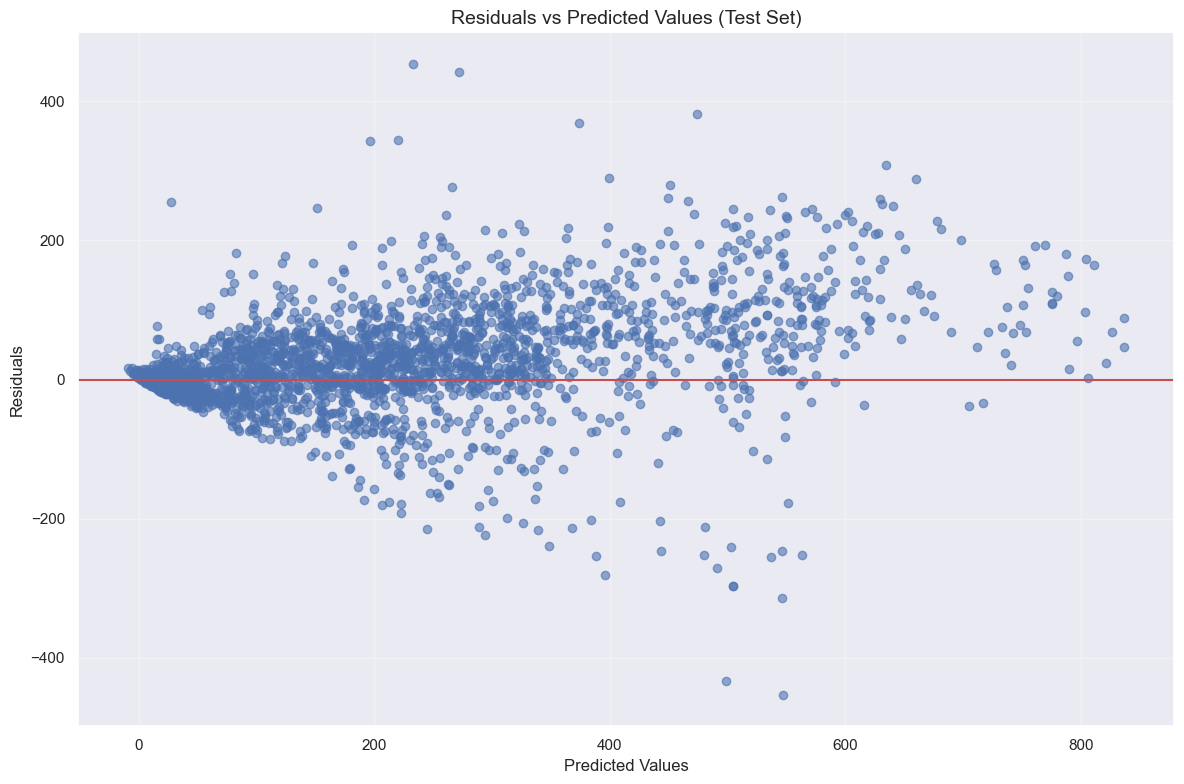

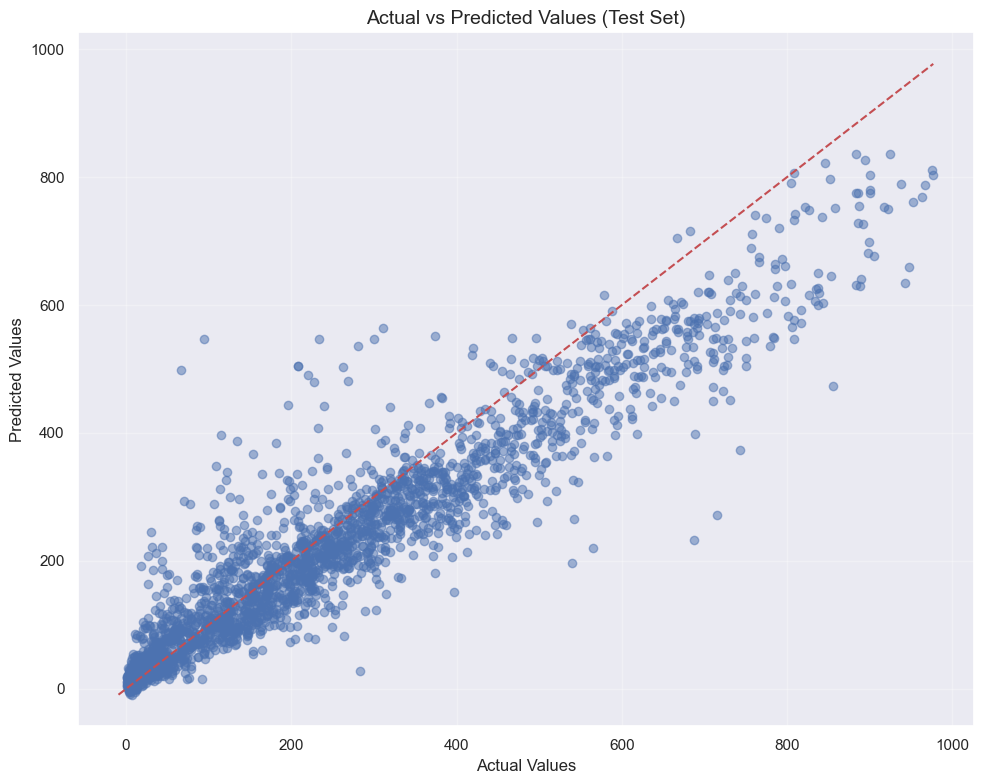

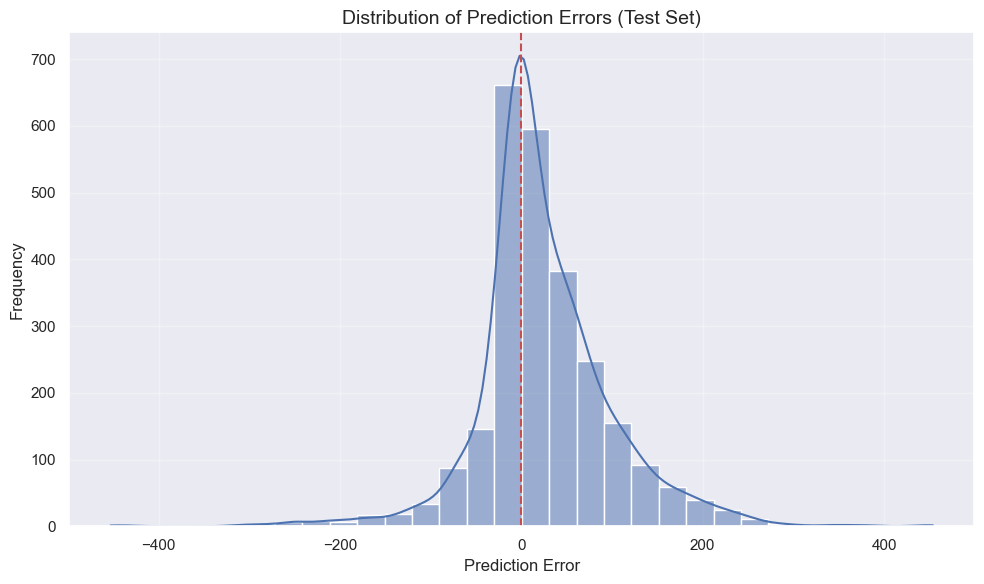

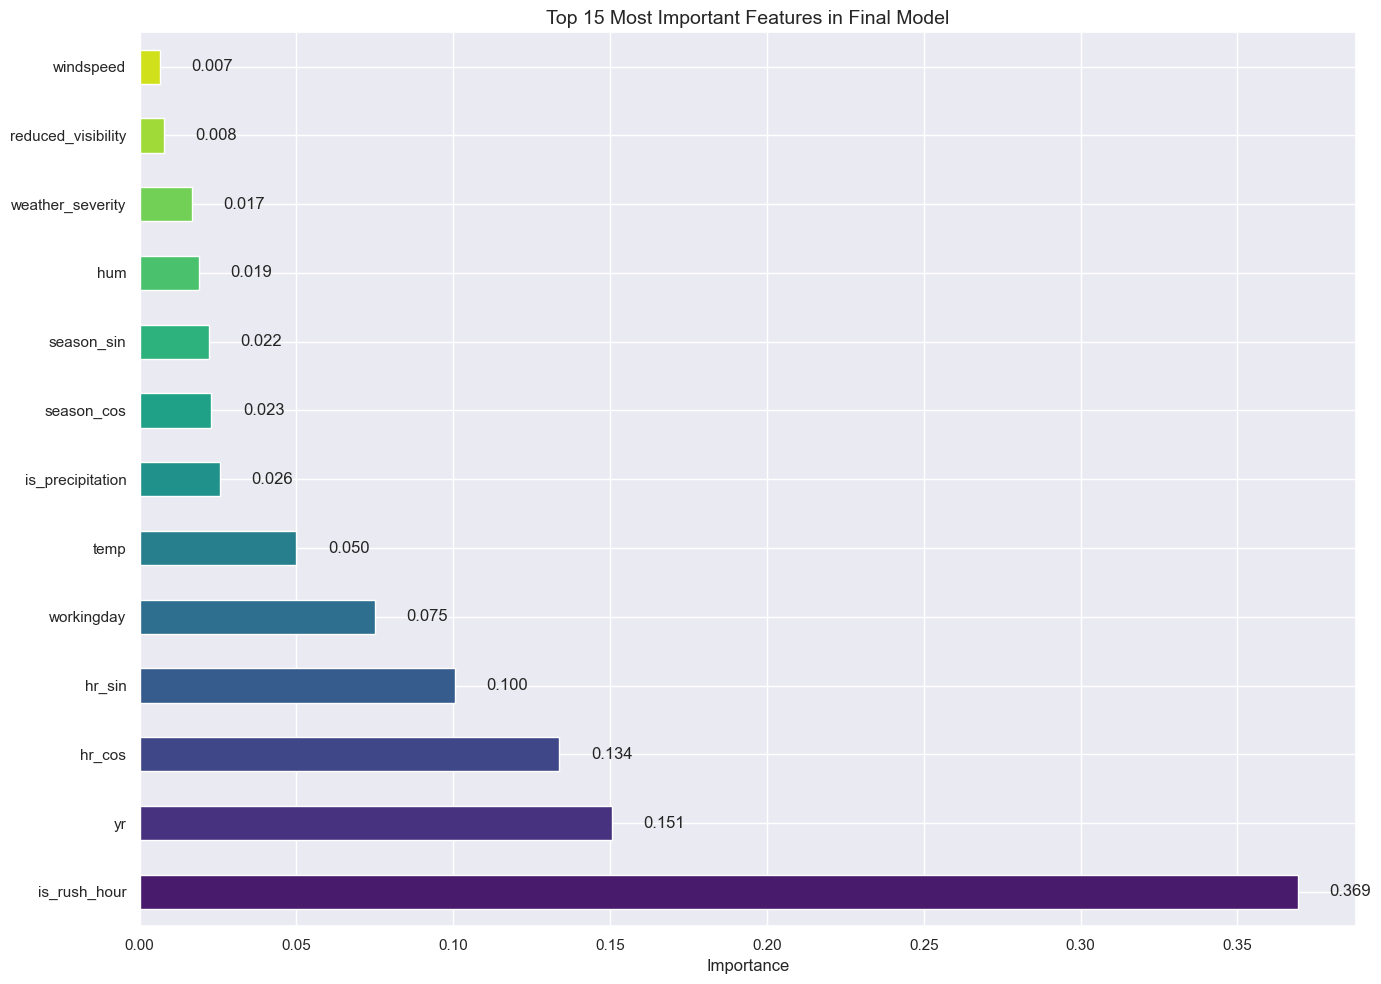


Final model saved to ../models/checkpoints\bike_rental_final_model.pkl
Feature names saved to ../models/checkpoints\model_feature_names.txt

FINAL MODEL SUMMARY:
- Algorithm: XGBoost Regression with Bayesian-optimized hyperparameters
- Training data: 14771 samples, 13 features
- Test performance: R² = 0.8670, RMSE = 78.45
- Top 3 most important features: is_rush_hour, yr, hr_cos
- Prediction bias: Model tends to underpredict by 25.32 rentals on average


In [48]:
print("="*80)
print("FINAL MODEL IMPLEMENTATION AND EVALUATION")
print("="*80)

# We'll use the original processed features where the model achieved 0.90+ R²
# Combine training and validation sets for final training
X_final_train = pd.concat([X_train_processed, X_val_processed])
y_final_train = pd.concat([y_train, y_val])

# Create a clean final model using the same hyperparameters as our best model
final_model = XGBRegressor(**xgb_bayes_search.best_params_, random_state=42)

# Print the best hyperparameters found during Bayesian optimization
print("Best hyperparameters from Bayesian optimization:")
for param, value in xgb_bayes_search.best_params_.items():
    print(f"  - {param}: {value}")

# Train on the combined data
print("\nTraining final model on combined training and validation data...")
final_model.fit(X_final_train, y_final_train)

# Make predictions on all three datasets to compare metrics
train_preds = final_model.predict(X_train_processed)
val_preds = final_model.predict(X_val_processed)
test_preds = final_model.predict(X_test_processed)

# Calculate comprehensive metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    mean_abs_pct_error = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    metrics_dict = {
        'Dataset': dataset_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'Median AE': medae,
        'MAPE (%)': mean_abs_pct_error,
        'R²': r2,
        'Explained Variance': explained_var
    }
    return metrics_dict

# Calculate metrics for all three datasets
train_metrics = calculate_metrics(y_train, train_preds, "Training")
val_metrics = calculate_metrics(y_val, val_preds, "Validation")
test_metrics = calculate_metrics(y_test, test_preds, "Test")

# Combine all metrics into a DataFrame for easier comparison
all_metrics = pd.DataFrame([train_metrics, val_metrics, test_metrics])

# Print the metrics table
print("\nComprehensive Model Performance Metrics:")
print(all_metrics.set_index('Dataset').round(4))

# Calculate if the model tends to overpredict or underpredict
avg_train_error = np.mean(y_train - train_preds)
avg_val_error = np.mean(y_val - val_preds)
avg_test_error = np.mean(y_test - test_preds)

print("\nPrediction Bias Analysis:")
print(f"Average Train Error: {avg_train_error:.2f} ({'Underpredicts' if avg_train_error > 0 else 'Overpredicts'})")
print(f"Average Validation Error: {avg_val_error:.2f} ({'Underpredicts' if avg_val_error > 0 else 'Overpredicts'})")
print(f"Average Test Error: {avg_test_error:.2f} ({'Underpredicts' if avg_test_error > 0 else 'Overpredicts'})")

# Plot residuals vs predicted values to check for patterns
plt.figure(figsize=(12, 8))
residuals = y_test - test_preds
plt.scatter(test_preds, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Predicted Values (Test Set)', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{checkpoint_dir}/prediction_analysis.png", dpi=300)
plt.show()

# Create a scatter plot with 45-degree line for actual vs predicted
plt.figure(figsize=(10, 8))
max_val = max(max(y_test), max(test_preds))
min_val = min(min(y_test), min(test_preds))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Actual vs Predicted Values (Test Set)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Add error distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribution of Prediction Errors (Test Set)', fontsize=14)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and visualize feature importance
plt.figure(figsize=(14, 10))
feature_importance = pd.Series(final_model.feature_importances_, 
                              index=X_final_train.columns).sort_values(ascending=False)
top_features = feature_importance.head(15)
ax = top_features.plot(kind='barh', color=sns.color_palette("viridis", len(top_features)))
plt.title('Top 15 Most Important Features in Final Model', fontsize=14)
plt.xlabel('Importance', fontsize=12)

# Add value labels to the bars
for i, v in enumerate(top_features):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Save the final model for future use
import pickle
import os
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
final_model_path = os.path.join(checkpoint_dir, 'bike_rental_final_model.pkl')
with open(final_model_path, 'wb') as f:
    pickle.dump(final_model, f)

# Save feature names for reference
feature_names_path = os.path.join(checkpoint_dir, 'model_feature_names.txt')
with open(feature_names_path, 'w') as f:
    f.write('\n'.join(X_final_train.columns.tolist()))

print(f"\nFinal model saved to {final_model_path}")
print(f"Feature names saved to {feature_names_path}")

# Print a summary of the model and its performance
print("\nFINAL MODEL SUMMARY:")
print(f"- Algorithm: XGBoost Regression with Bayesian-optimized hyperparameters")
print(f"- Training data: {X_final_train.shape[0]} samples, {X_final_train.shape[1]} features")
print(f"- Test performance: R² = {test_metrics['R²']:.4f}, RMSE = {test_metrics['RMSE']:.2f}")
print(f"- Top 3 most important features: {', '.join(top_features.index[:3])}")
print(f"- Prediction bias: Model tends to {'underpredict' if avg_test_error > 0 else 'overpredict'} by {abs(avg_test_error):.2f} rentals on average")

This model performs the best out of all the models we have trained. It has the lowest RMSE and MAE on the test set, indicating that it is the most accurate model for predicting bike rentals.
Although it does generall underpredict this is expected as the data used for training contains a slow increase in bike rentals over time. This is not very reflected in the training data as there is a near doubling in rentals from one year to the next.
An 86% accuracy is very good for this model, and I am happy with the results. I will be using this model for my final submission.